# <center><span style="color:DarkBlue">EDA 및 전처리</span></center> <a class="tocSkip">

## 데이터 설명
- [Should This Loan be Approved or Denied?]('https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied')
- 미국 중소기업청(SBA)에서 제공한 데이터
- FedEx, Apple computer 등 SBA 대출 보증을 받은 스타트업의 성공 사례가 있으나, 중소기업이 SBA 보증 대출을 채무 불이행한 사례도 있음.

## 변수 설명
- LoanNr_ChkDgt : 식별 키
- Name : 차용 기업명(Borrower)
- City : 차용 기업이 위치한 도시
- State : 차용 기업이 위치한 주
- Zip : 차용 기업의 우편 번호
- Bank : 은행 이름
- BankState : 은행이 위치한 주
- NAICS : 북미 산업 분류 체계 코드
- ApprovalDate : SBA 약정 발행 날짜 ?
- ApprovalFY : 약정 회계 연도
- Term : 대출 기간(개월)
- NoEmp : 직원 수
- NewExist : 1 = 기존 비즈니스, 2 = 신규 비즈니스
- CreateJob : 창출된 직원 수
- RetainedJob : 유지 직원 수
- FranchiseCode	: 프랜차이즈 여부 (00000 or 00001) = 프랜차이즈 아님
- UrbanRural : 1 = 도시, 2 = 농촌, 0 = 정의되지 않음
- RevLineCr : 리볼빙 신용 한도(Y = 예, N = 아니요)
- LowDoc : SBA의 LowDoc 대출 프로그램(Y = 예, N = 아니요)
- ChgOffDate : 대출이 채무 불이행으로 선언되는 날짜
- DisbursementDate : 대금 지급일
- DisbursementGross : 지급된 금액
- BalanceGross : 미결제 총액
- `MIS_Status` : 대출 상태 청구됨 = CHGOFF, 전액 결제됨 = PIF
- ChgOffPrinGr : 청구된 금액
- GrAppv : 은행에서 승인한 대출 금액
- SBA_Appv : SBA의 승인된 대출 보증 금액

## 도메인 지식
- `SBA`는 1953년 미국 중소기업을 육성하고 지원하는 목적으로 설립된 기관임. 은행 대출을 보증함으로써 중소기업이 대출을 원활히 실행할 수 있도록 보장하고, 은행이 받을 수 있는 위험을 감소시켜주는 역할을 하고 있음.
- State 변수 중 `DC`는 워싱턴 DC로 미국 50개의 주에 포함되지 않고 미국의 수도로서 특별행정구를 의미. 미국 연방 정부가 위치한 지역
- `리볼빙`은 신용카드 이용 금액의 일부만 갚으면 나머지 금액은 약간의 이자와 함께 다음 결제 대상으로 연체하여, 연체자로 분류하지 않고 계속해서 카드를 사용할 수 있도록 하는 제도
- `LowDoc`은 SBA의 대출 프로그램으로, 이를 이용하면 $150,000 이하의 대출을 다소 쉽게 신청할 수 있음. LowDoc은 적은 서류(low documentation)을 의미하며, 승인 여부는 신용 등급에 따라 다름.
- NewExist 변수의 경우 기존 비즈니스는 2년 이상, 신규 비즈니스는 2년 미만 비즈니스를 말한다.(데이터 설명 자료)
- The Great Recession(세계 대공황)이 일어난 시기는 전미경제연구소(The National Bureau of Economic Research)에 의하면 2007년 12월부터 2009년 6월까지이다. ('https://money.cnn.com/2010/09/20/news/economy/recession_over/')
- 일반적으로 SBA 대출 만기는 5년~25년이라고 함

## 라이브러리 불러오기

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

In [2]:
# 결측치 확인하는 라이브러리
import missingno as msno 

# 다중대체 라이브러리
from fancyimpute import IterativeImputer

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

(CVXPY) Mar 28 07:36:43 PM: Encountered unexpected exception importing solver CVXOPT:
ImportError('DLL load failed while importing base: 지정된 모듈을 찾을 수 없습니다.')
(CVXPY) Mar 28 07:36:43 PM: Encountered unexpected exception importing solver GLPK:
ImportError('DLL load failed while importing base: 지정된 모듈을 찾을 수 없습니다.')
(CVXPY) Mar 28 07:36:43 PM: Encountered unexpected exception importing solver GLPK_MI:
ImportError('DLL load failed while importing base: 지정된 모듈을 찾을 수 없습니다.')


In [3]:
# Window의 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

## 데이터 불러오기

In [4]:
# working directory 확인
os.getcwd() #현재 작업 위치 출력

'C:\\Users\\82105\\비어플\\24-1 프로젝트\\code'

In [5]:
data = pd.read_csv('C:/Users/82105/비어플/24-1 프로젝트/data/SBAnational.csv', low_memory=False)
df = data.copy() #원본 데이터

## EDA
- 데이터 구조 확인
- 중복된 행 여부 확인
- 기술통계량 확인
- 결측치 확인
- 이상치 확인
- 상관계수 확인
- 변수별로 분포 확인

### 1. 데이터 구조 확인

In [6]:
print(df.shape)
display(df.head())
display(df.tail())
print(df.info())

(899164, 27)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"
899163,9996003010,PACIFIC TRADEWINDS FAN & LIGHT,KAILUA,HI,96734,CENTRAL PACIFIC BANK,HI,0,27-Feb-97,1997,...,N,N,NaN,31-May-97,"$30,000.00",$0.00,P I F,$0.00,"$30,000.00","$24,000.00"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

=> Name, City, State,Bank, BankState, NewExist, RevLineCr, LowDoc, ChgOffDate, DisbursementDate 변수에 결측치가 있는 것으로 보임.

### 2. 중복된 행 여부 확인

In [7]:
# 중복된 행 여부 확인
df[df.duplicated(keep=False)] #keep=False: 모든 중복행을 표시

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv


=> 중복된 행 없음!

### 3. 기술통계량 확인
- 수치형 변수들의 기술통계량 확인
- 형태는 수치형이지만, 의미상 범주형인 경우 제외

In [6]:
# 수치형으로 데이터 유형 바꾸기
selected_columns = ['DisbursementGross', 'BalanceGross','ChgOffPrinGr', 'GrAppv', 'SBA_Appv'] #금액 변수들
df[selected_columns] = df[selected_columns].replace('[\$,]', '', regex=True).astype(float)
df[selected_columns] = df[selected_columns].astype(str).replace('\.00$', '', regex=True)
df[selected_columns] = df[selected_columns].astype(float).astype(int) # 소수점 이하 ".0" 제거
df[selected_columns]

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000,0,0,60000,48000
1,40000,0,0,40000,32000
2,287000,0,0,287000,215250
3,35000,0,0,35000,28000
4,229000,0,0,229000,229000
...,...,...,...,...,...
899159,70000,0,0,70000,56000
899160,85000,0,0,85000,42500
899161,300000,0,0,300000,225000
899162,75000,0,46383,75000,60000


In [28]:
# 수치형 변수들의 기술통계량 확인
description = df[['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'BalanceGross','ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].describe()
description

,Term,NoEmp,NewExist,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,8.991640e+05,899164.000000,8.991640e+05,8.991640e+05,8.991640e+05
mean,110.773078,11.411353,1.280404,8.430376,10.797257,2.011540e+05,2.989349,1.350330e+04,1.926870e+05,1.494888e+05
std,78.857305,74.108196,0.451750,236.688165,237.120600,2.876408e+05,1442.161912,6.515229e+04,2.832634e+05,2.284146e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2.000000e+02,1.000000e+02
25%,60.000000,2.000000,1.000000,0.000000,0.000000,4.200000e+04,0.000000,0.000000e+00,3.500000e+04,2.125000e+04
50%,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.125000e+04
75%,120.000000,10.000000,2.000000,1.000000,4.000000,2.380000e+05,0.000000,0.000000e+00,2.250000e+05,1.750000e+05
max,569.000000,9999.000000,2.000000,8800.000000,9500.000000,1.144632e+07,996262.000000,3.512596e+06,5.472000e+06,5.472000e+06


In [29]:
# 깔끔하게 보이기 위해 소수점 조절
description = description.round(2)
description

,Term,NoEmp,NewExist,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,899164.00,899164.00,899028.00,899164.00,899164.00,899164.00,899164.00,899164.00,899164.00,899164.00
mean,110.77,11.41,1.28,8.43,10.80,201154.02,2.99,13503.30,192686.98,149488.79
std,78.86,74.11,0.45,236.69,237.12,287640.85,1442.16,65152.29,283263.39,228414.56
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00,100.00
25%,60.00,2.00,1.00,0.00,0.00,42000.00,0.00,0.00,35000.00,21250.00
50%,84.00,4.00,1.00,0.00,1.00,100000.00,0.00,0.00,90000.00,61250.00
75%,120.00,10.00,2.00,1.00,4.00,238000.00,0.00,0.00,225000.00,175000.00
max,569.00,9999.00,2.00,8800.00,9500.00,11446325.00,996262.00,3512596.00,5472000.00,5472000.00


- NoEmp의 최소값이 0?
- 변수별 분포 확인에서 다시 확인

### 4. 결측치 확인

In [12]:
# 결측치 확인
df.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

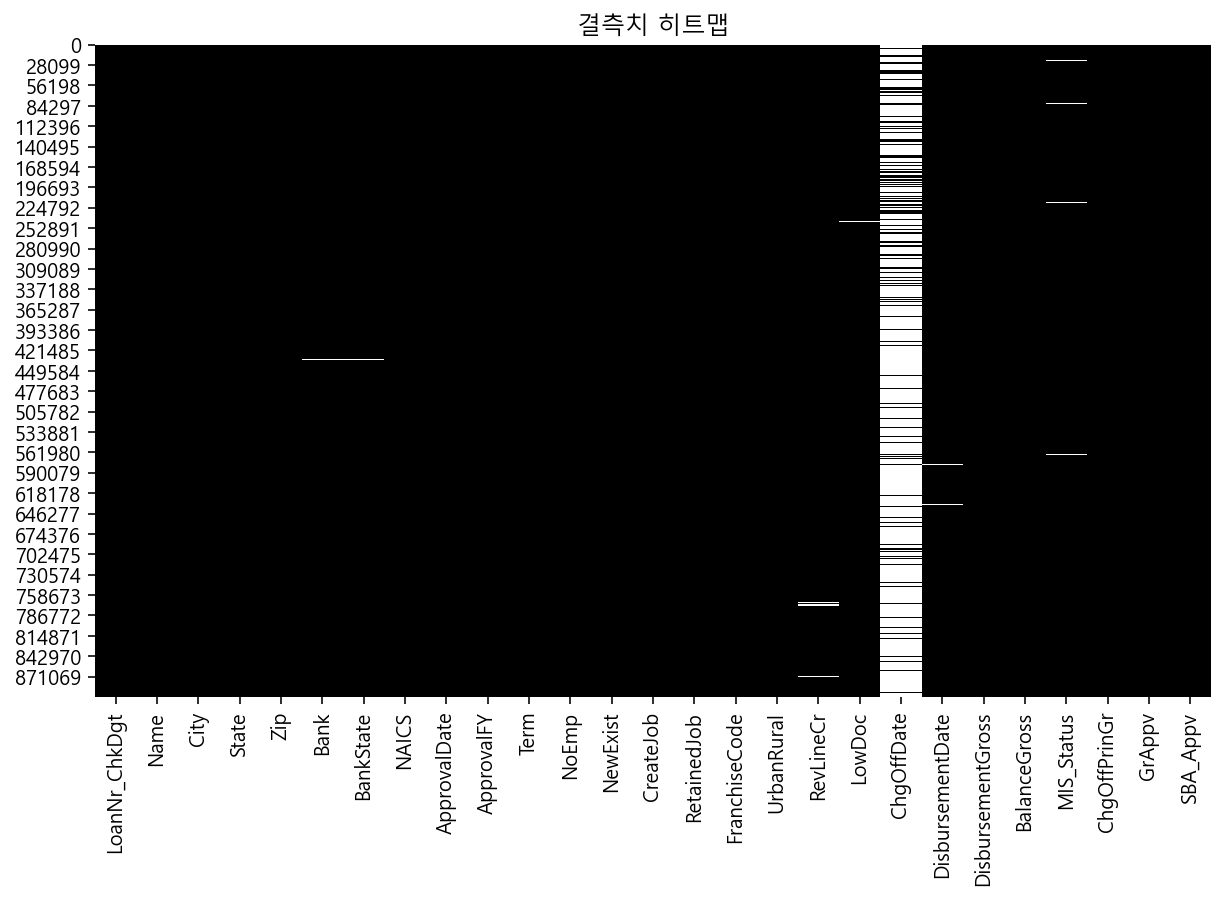

In [15]:
# 결측치 시각화 sns 사용
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='Greys_r', cbar=False)
plt.title('결측치 히트맵')
plt.show()

<Axes: >

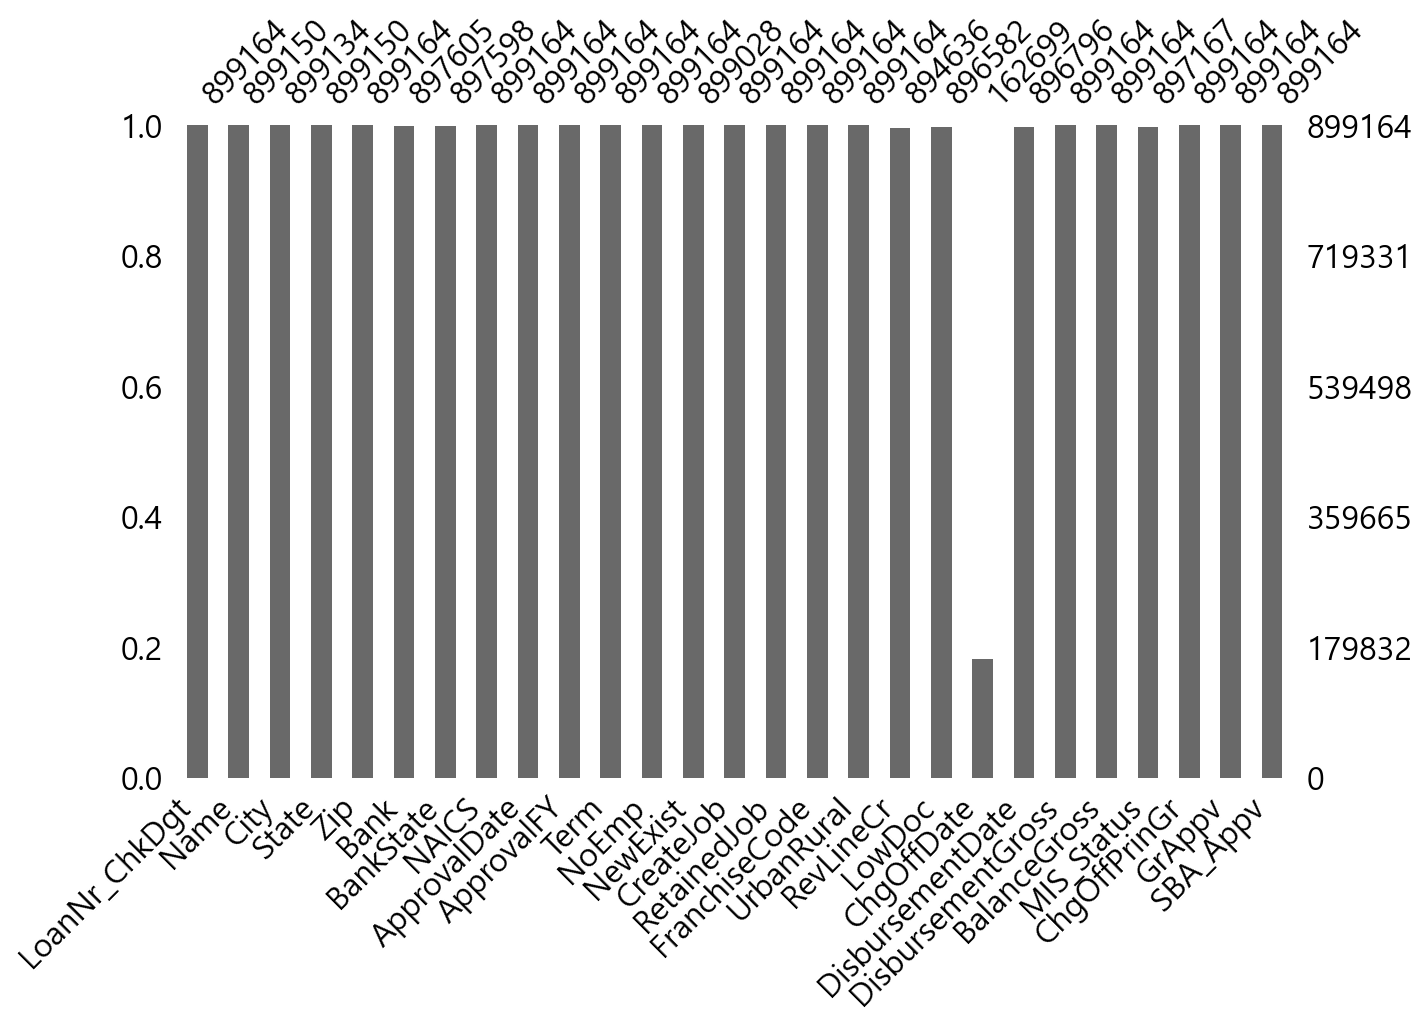

In [11]:
# 결측치 시각화 - msno 사용
msno.bar(df, figsize=(10,6)) #msno.matrix()는 에러로 인해 msno.bar()로 시각화하였음(msno와 matplotlib 간의 호환성 문제인 것으로 보임)

=> ChgOffDate 변수의 결측치가 가장 많은 것으로 나타남.

### 5. 이상치 확인

- 수치형 변수들에 한해 이상치 파악
- 형태는 수치형이지만, 의미상 범주형인 경우 제외

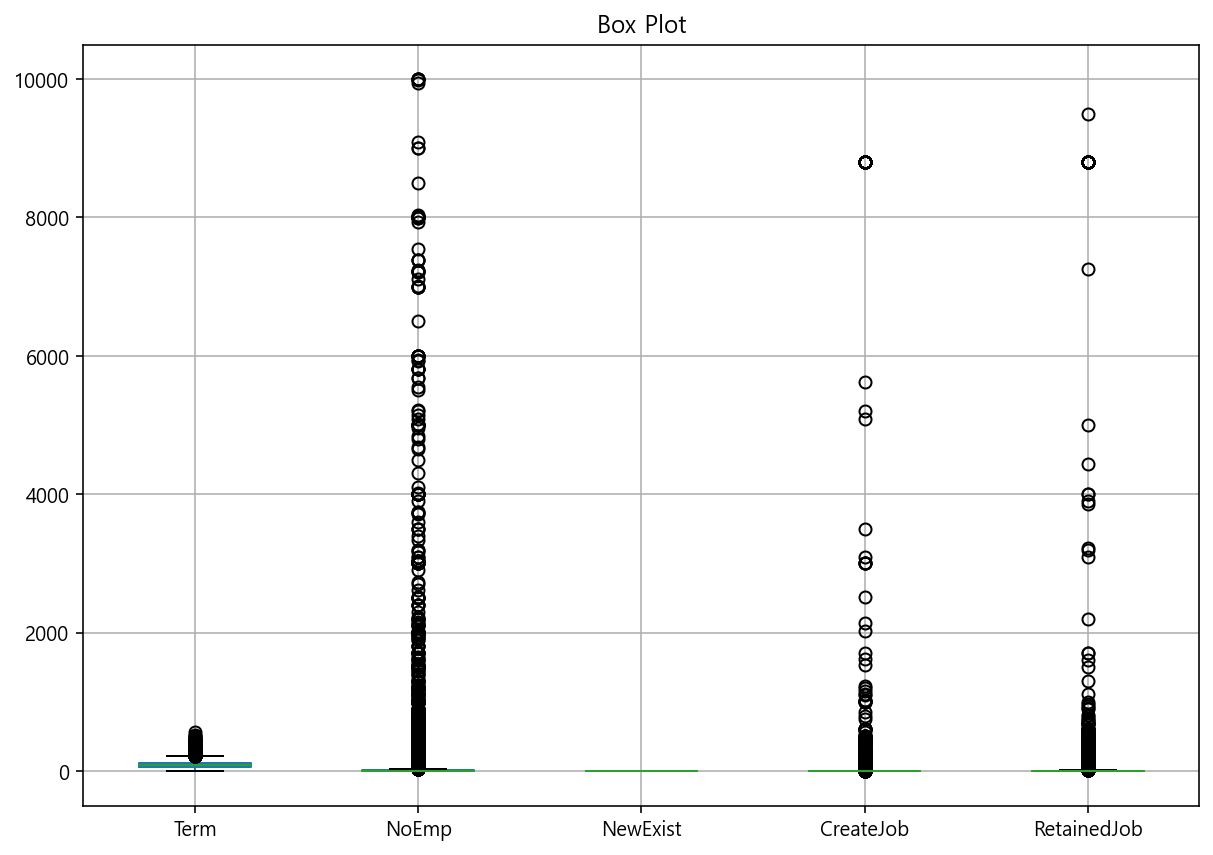

In [41]:
#matplotlib을 이용한 BoxPlot
plt.figure(figsize=(10, 7))
df.boxplot(column=['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob'])
plt.title("Box Plot")
plt.show()

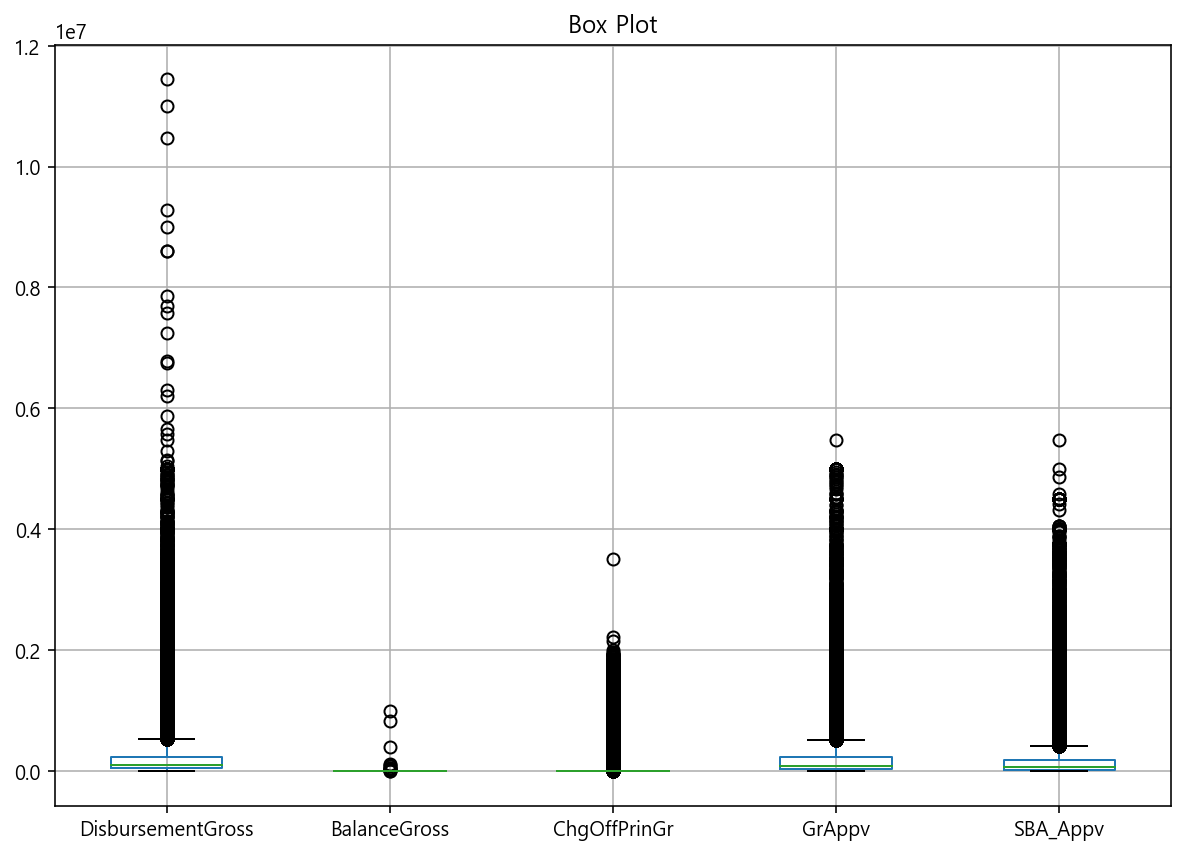

In [42]:
#matplotlib을 이용한 BoxPlot
plt.figure(figsize=(10, 7))
df.boxplot(column=['DisbursementGross', 'BalanceGross','ChgOffPrinGr', 'GrAppv', 'SBA_Appv'])
plt.title("Box Plot")
plt.show()

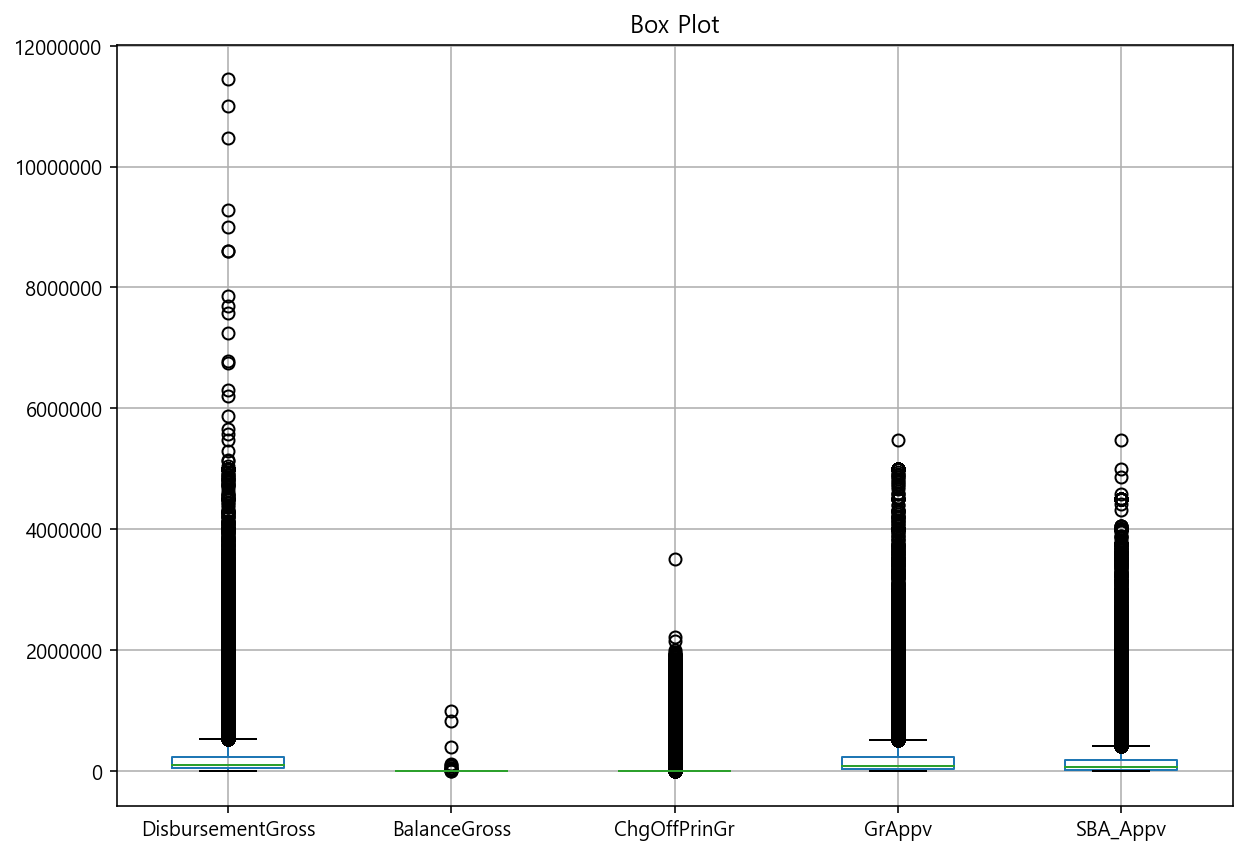

In [43]:
#matplotlib을 이용한 BoxPlot
plt.figure(figsize=(10, 7))
df.boxplot(column=['DisbursementGross', 'BalanceGross','ChgOffPrinGr', 'GrAppv', 'SBA_Appv'])
plt.ticklabel_format(style='plain', axis='y') # 왼쪽 축의 표시 형식 변경
plt.title("Box Plot")
plt.show()

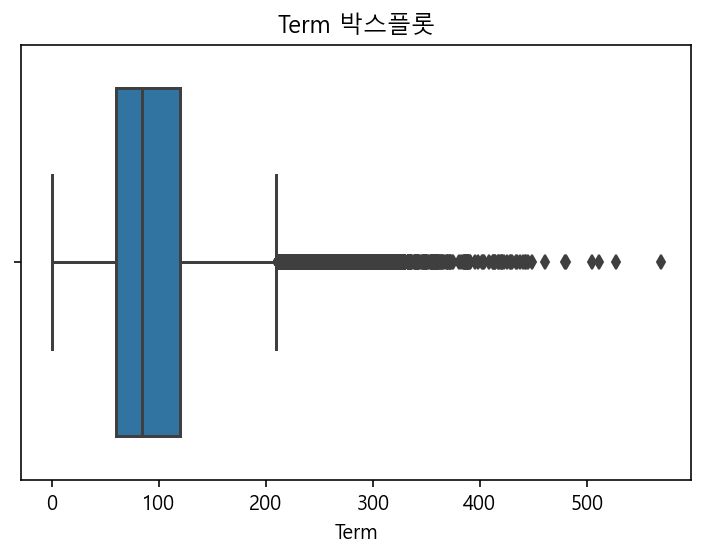

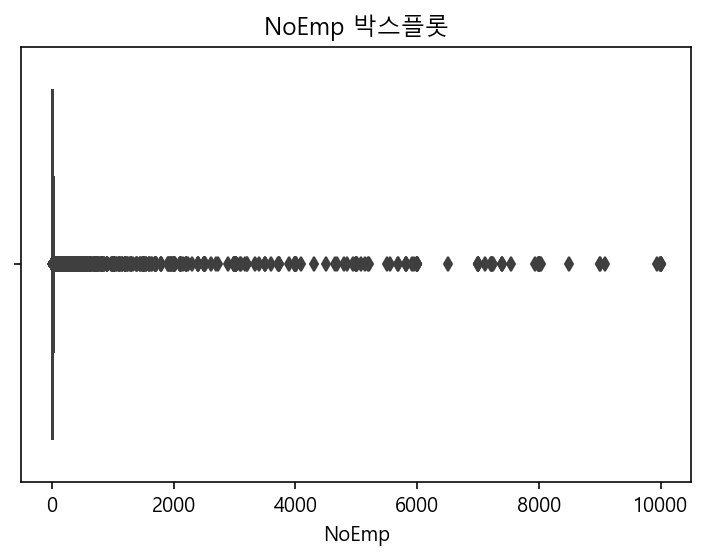

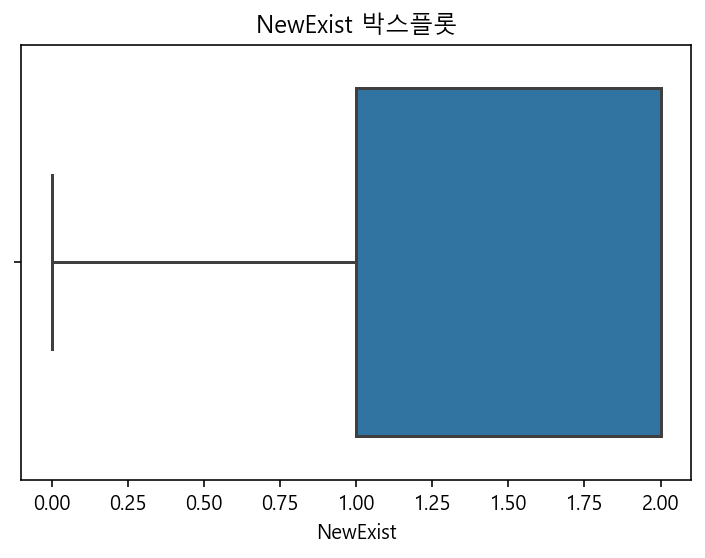

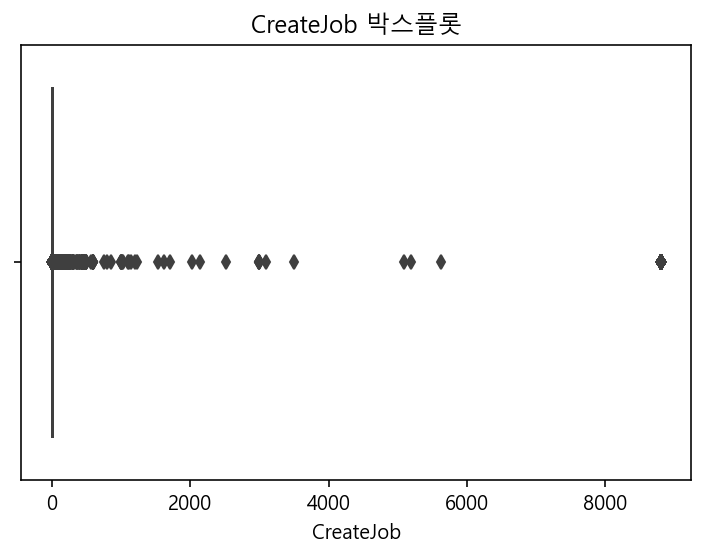

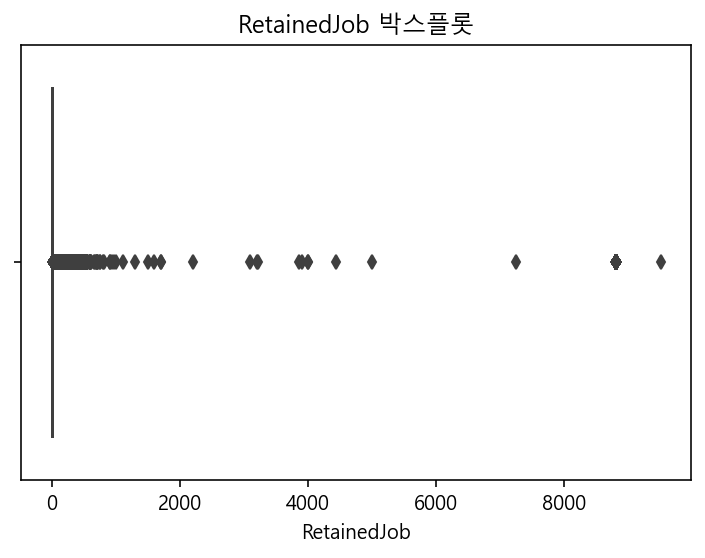

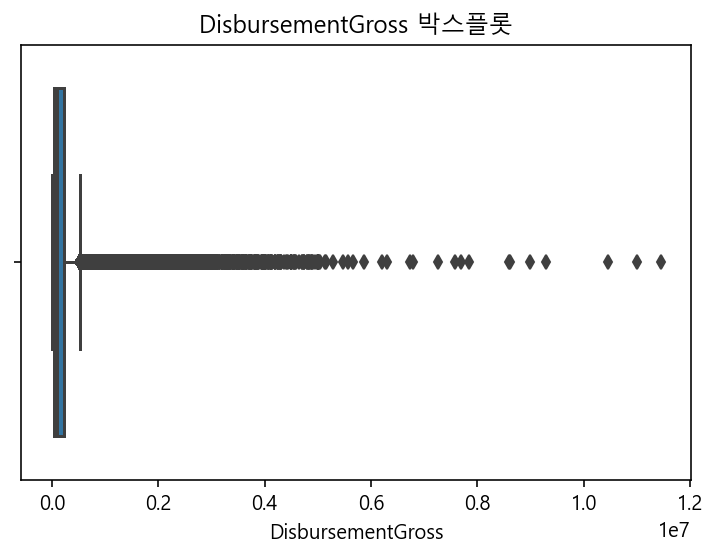

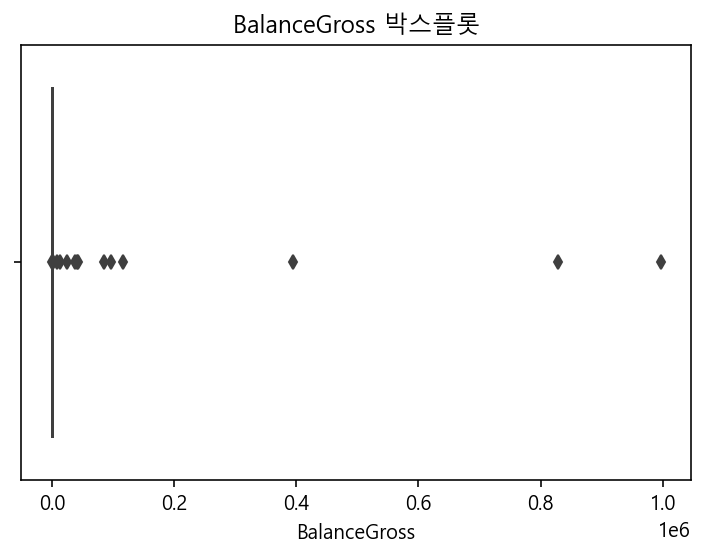

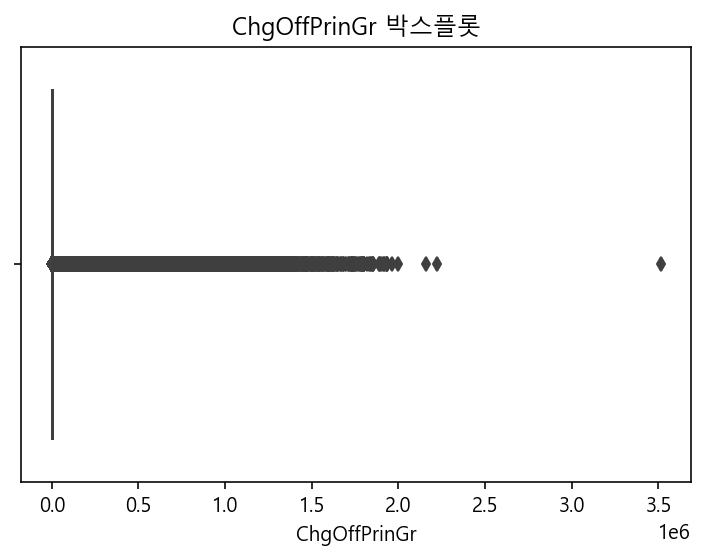

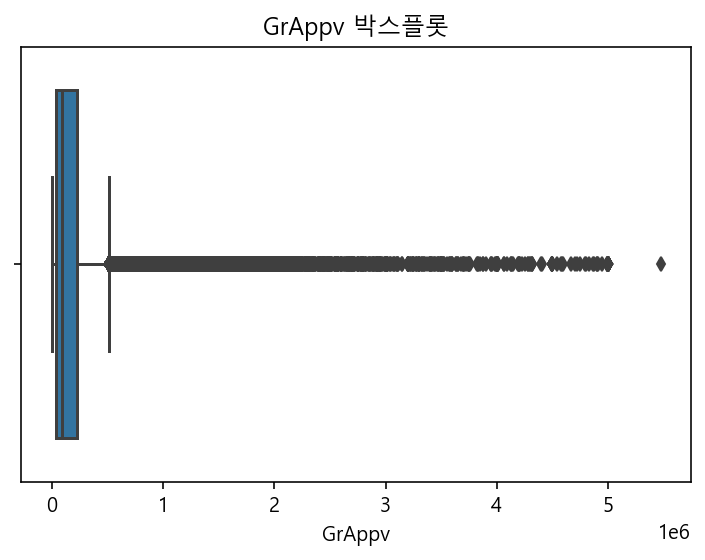

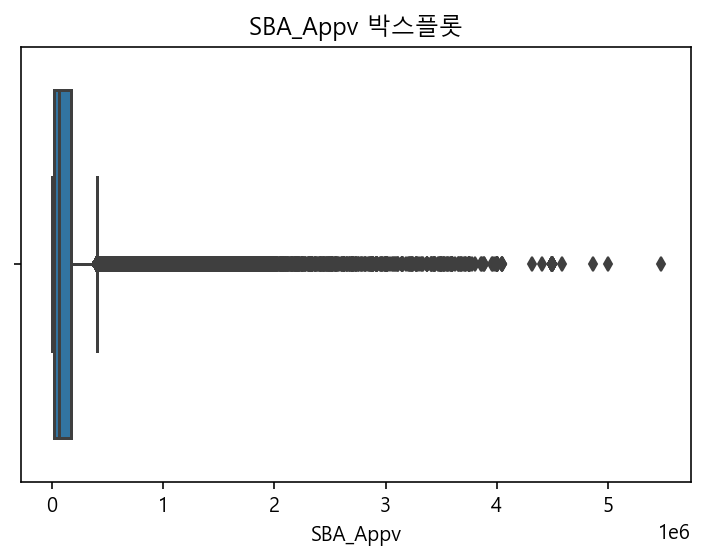

In [34]:
for column in ['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'BalanceGross','ChgOffPrinGr', 'GrAppv', 'SBA_Appv']:
    sns.boxplot(x=column, data=df)
    plt.title('{} 박스플롯'.format(column))
    plt.show()

- NewExist을 제외한 나머지 수치형 변수(Term, NoEmp, CreateJob, RetainedJob, DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, SBA_Appv)에 이상치가 존재하는 것처럼 보임. 
- **1차 전처리에서 확인할 필요!**
- 참고로 오른쪽 하단에 1e6은 해당 축이 수백만의 범위를 다루고 있음을 나타냄. 데이터의 값이 매우 크기 때문에 나타난 현상.

## ***데이터 요약**

In [24]:
# 데이터 요약
def report(df1):
    col = []          # 열 이름
    d_type = []       # 데이터 타입
    uniques = []      # 유일값 처음 5개
    n_uniques = []    # 유일값 개수(NaN제외)
    nan_count = []    # 결측치 개수
    nan_percent = []  # 결측치 비율

    for i in df.columns:
        col.append(i)
        d_type.append(df1[i].dtypes)
        uniques.append(df1[i].unique()[:5])
        n_uniques.append(df1[i].nunique())
        nan_count.append(df1[i].isna().sum())
        nan_percent.append(df1[i].isna().sum()/len(df)*100)

    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques, 'nan_count': nan_count, 'nan%': nan_percent})


report(df)

,Column,d_type,unique_sample,n_uniques,nan_count,nan%
0,LoanNr_ChkDgt,int64,"[1000014003, 1000024006, 1000034009, 100004400...",899164,0,0.000000
1,Name,object,"[ABC HOBBYCRAFT, LANDMARK BAR & GRILLE (THE), ...",779583,14,0.001557
2,City,object,"[EVANSVILLE, NEW PARIS, BLOOMINGTON, BROKEN AR...",32581,30,0.003336
3,State,object,"[IN, OK, FL, CT, NJ]",51,14,0.001557
4,Zip,int64,"[47711, 46526, 47401, 74012, 32801]",33611,0,0.000000
5,Bank,object,"[FIFTH THIRD BANK, 1ST SOURCE BANK, GRANT COUN...",5802,1559,0.173383
6,BankState,object,"[OH, IN, OK, FL, DE]",56,1566,0.174162
7,NAICS,int64,"[451120, 722410, 621210, 0, 332721]",1312,0,0.000000
8,ApprovalDate,object,"[28-Feb-97, 2-Jun-80, 7-Feb-06, 11-Jun-80, 4-O...",9859,0,0.000000
9,ApprovalFY,object,"[1997, 1980, 2006, 1998, 1999]",52,0,0.000000


### 6. 상관계수 확인
- 수치형 변수들에 한해 상관관계 확인
- 형태는 수치형이지만, 의미상 범주형인 경우 제외

In [16]:
# 변수 간 상관계수 계산
cor = df[['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'BalanceGross','ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].corr()
cor

,Term,NoEmp,NewExist,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
Term,1.000000,0.046140,-0.073100,0.027581,0.024931,0.466391,0.001701,-0.047319,0.502610,0.524912
NoEmp,0.046140,1.000000,-0.040222,0.008626,0.015350,0.088651,-0.000122,0.007800,0.090430,0.092566
NewExist,-0.073100,-0.040222,1.000000,-0.002130,-0.009128,-0.074405,0.001355,0.018502,-0.066506,-0.063976
CreateJob,0.027581,0.008626,-0.002130,1.000000,0.993953,0.006955,-0.000057,0.009378,0.008182,0.013749
RetainedJob,0.024931,0.015350,-0.009128,0.993953,1.000000,0.010274,-0.000080,0.010632,0.010693,0.014891
DisbursementGross,0.466391,0.088651,-0.074405,0.006955,0.010274,1.000000,0.005595,0.192251,0.971242,0.940134
BalanceGross,0.001701,-0.000122,0.001355,-0.000057,-0.000080,0.005595,1.000000,-0.000430,0.005739,0.005266
ChgOffPrinGr,-0.047319,0.007800,0.018502,0.009378,0.010632,0.192251,-0.000430,1.000000,0.194453,0.165476
GrAppv,0.502610,0.090430,-0.066506,0.008182,0.010693,0.971242,0.005739,0.194453,1.000000,0.974360
SBA_Appv,0.524912,0.092566,-0.063976,0.013749,0.014891,0.940134,0.005266,0.165476,0.974360,1.000000


Text(0.5, 1.0, '상관계수 히트맵')

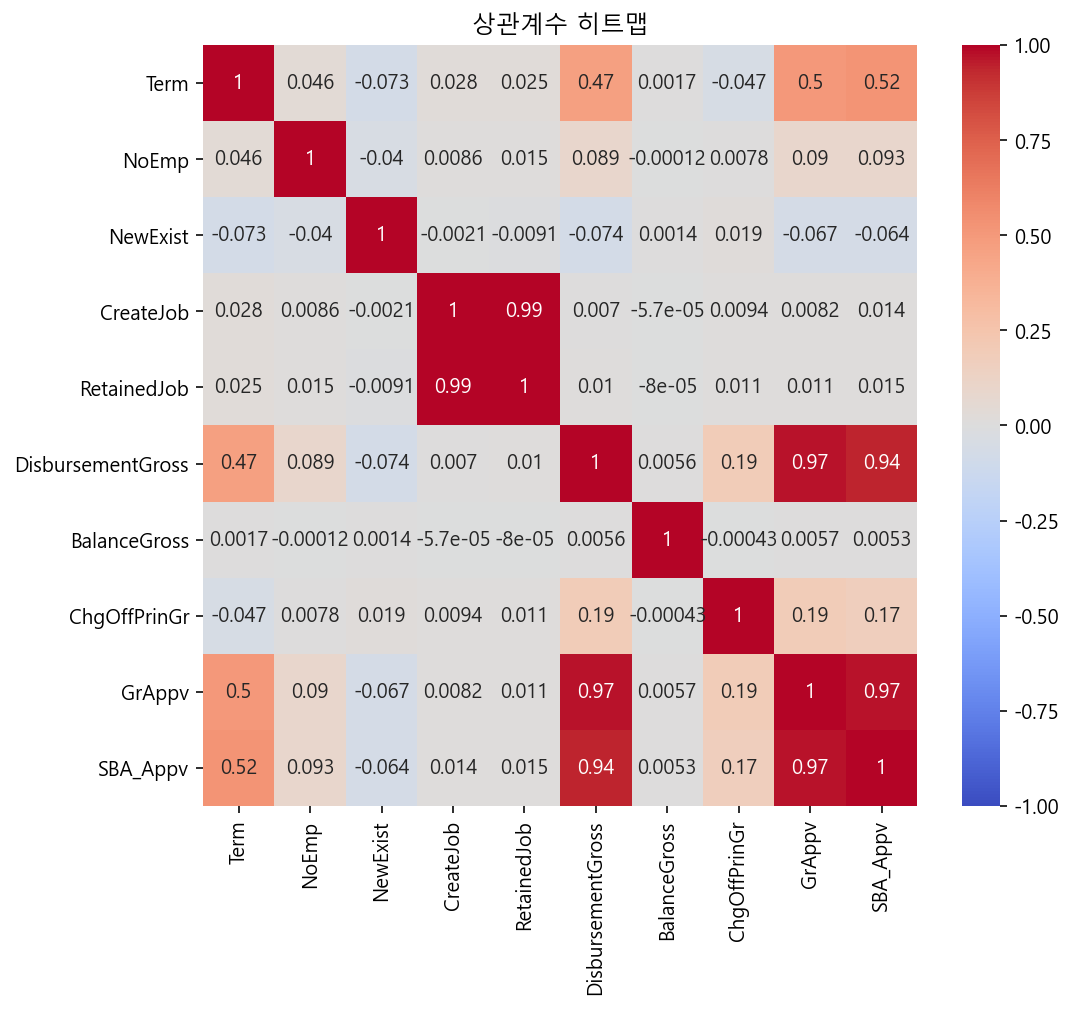

In [17]:
# 히트맵 시각화
plt.figure(figsize=(8,7)) #사이즈 조정
sns.heatmap(cor, cmap="coolwarm", annot=True, vmin=-1,vmax=1)
plt.title('상관계수 히트맵')

#cmap: 컬러맵 설정
#annot=True: 상관계수 표시 여부
#vmin, vmax: 최대, 최소 값 설정

- 전체적으로 변수들 사이에 상관관계가 크지 않음.
- 제일 상관계수가 큰 변수쌍은 (CreateJob, RetainedJob)

Text(0.5, 1.0, '상관계수 히트맵')

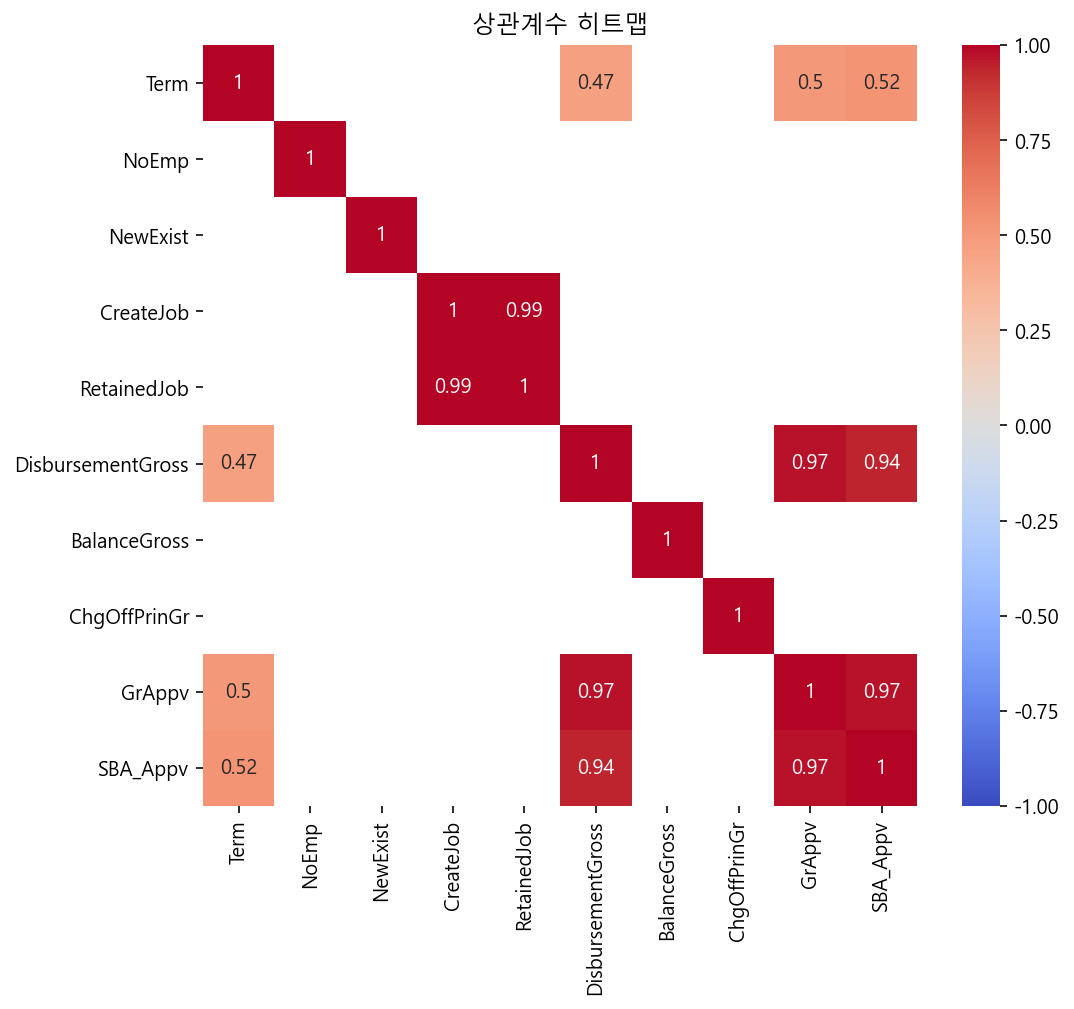

In [18]:
# 히트맵에서 상관계수의 절댓값이 0.4 이상인 경우만 추출
plt.figure(figsize=(8,7))
sns.heatmap(cor[abs(cor) >= 0.4], cmap="coolwarm", annot=True, vmin=-1,vmax=1)
plt.title('상관계수 히트맵')

- 대출기간과 지급된 금액 간의 상관관계는 0.47으로 뚜렷한 양의 상관관계를 보인다.(대출기간이 길어질수록 지급된 금액이 많다)
- 대출기간과 은행에서 승인한 대출 금액 간의 상관관계는 0.5로 뚜렷한 양의 상관관계를 보인다.(대출기간이 길어질수록 은행에서 승인한 대출 금액이 크다)
- 대출기간과 SBA에서 승인한 대출 금액 간의 상관관계는 0.52로 뚜렷한 양의 상관관계를 보인다.(대출기간이 길어질수록 SBA에서 승인한 대출 금액이 크다)
- 장기로 대출을 하는 경우, 실제 대출 금액과 기관에서 승인한 대출 금액 모두 크다.
- 상식적으로 ok

- 창출 직원 수와 유지 직원 수 간의 상관관계는 0.99로 강한 양의 상관관계를 보인다.
- 일자리가 늘어나 직원의 수가 늘어나는 것은 당연하므로 상식적으로 ok

- 지급된 금액과 은행에서 승인한 대출 금액 간의 상관관계는 0.97로 강한 양의 상관관계를 보인다.
- 지급된 금액과 SBA에서 승인한 대출 금액 간의 상관관계는 0.94로 강한 양의 상관관계를 보인다.
- 은행에서 승인한 대출 금액과, SBA에서 승인한 대출 금액 간의 상관관계는 0.97로 강한 양의 상관관계를 보인다.
- 실제로 대출을 해줬을 때, 지급한 금액과 은행/SBA 대출 보증금액 간에 큰 차이가 없다고 해석할 수 있다. 
- 상식적으로 ok

### 7. 변수별 분포 확인

범주형 변수 : MIS_Status, LoanNr_ChkDgt, Name, City, State, Zip, Bank, BankState, NAICS, ApprovalDate, ApprovalFY, NewExist, FranchiseCode, UrbanRural, RevLineCr, LowDoc, ChgOffDate, DisbursementDate (의미상 범주형 변수도 포함)

(1) MIS_Status : 채무이행 유무(Target Variable)

In [19]:
df.MIS_Status

0          P I F
1          P I F
2          P I F
3          P I F
4          P I F
           ...  
899159     P I F
899160     P I F
899161     P I F
899162    CHGOFF
899163     P I F
Name: MIS_Status, Length: 899164, dtype: object

In [48]:
# 채무이행(0), 채무불이행(1)로 카테고리화
df['MIS_Status']=df['MIS_Status'].replace({'P I F':0, 'CHGOFF':1})
df['MIS_Status']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
899159    0.0
899160    0.0
899161    0.0
899162    1.0
899163    0.0
Name: MIS_Status, Length: 899164, dtype: float64

In [49]:
df['MIS_Status'].unique()

array([ 0.,  1., nan])

In [31]:
# MIS_Status 칼럼이 NA인 경우만 추출해보기
# ChgOffPrinGr 칼럼과 비교하여 값이 0인 경우와 그렇지 않은 경우
df[df['MIS_Status'].isnull()]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
343,1002585010,"Chinaberry, LTD",Saratoga Springs,NY,12866,KEYBANK NATIONAL ASSOCIATION,OH,0,18-May-98,1998,...,0,N,NaN,30-Jun-98,474,0,NaN,0,30000,15000
611,1004503009,SMITHFIELD GLASS INC,DANIELSON,CT,6239,NaN,NaN,0,7-Jul-80,1980,...,N,N,22-May-90,NaN,0,0,NaN,144461,300000,300000
738,1005264007,AMERICAN CERTIFIED HOME INSPEC,BOISE,ID,83703,WELLS FARGO BANK NATL ASSOC,SD,0,3-Mar-97,1997,...,T,N,NaN,30-Apr-00,2585,0,NaN,0,10000,5000
740,1005273003,"GENERAL SOLAR COMPANY, INC.",SIOUX CITY,IA,51111,NaN,NaN,0,3-Jul-80,1980,...,N,N,8-Feb-90,NaN,0,0,NaN,142666,350000,350000
833,1005845000,SPROUT KIDS INC.,HUNTINGTON,NY,11743,JPMORGAN CHASE BANK NATL ASSOC,IL,424330,3-Mar-03,2003,...,N,N,NaN,31-Mar-03,1276,0,NaN,0,25000,12500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892340,9855003006,PATHCO,ALAMEDA,CA,94605,WELLS FARGO BANK NATL ASSOC,SD,0,19-Dec-96,1997,...,0,N,NaN,NaN,0,0,NaN,0,50000,25000
893791,9879293006,YAMA SEAFOOD L.A.,SAN GABRIEL,CA,91776,WELLS FARGO BANK NATL ASSOC,SD,0,6-Jan-97,1997,...,0,N,NaN,30-Apr-98,373,0,NaN,0,25000,12500
894290,9889203005,SKY PILOT RESTORATIONS,PORTLAND,OR,97206,WELLS FARGO BANK NATL ASSOC,SD,0,10-Jan-97,1997,...,T,N,NaN,31-Jul-97,20,0,NaN,0,10000,5000
896318,9932493007,"SMITH, CURTIS",RICHMOND,VA,23225,FIRST COMMUNITY BANK,VA,0,30-Jan-97,1997,...,N,Y,NaN,13-Feb-97,3500,0,NaN,0,3500,2800


In [34]:
# 채무 불이행인 경우 중, 청구된 금액이 없는 경우 있는지 추출
df[(df['MIS_Status'] == 1) & (df['ChgOffPrinGr'] == 0)]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
489,1003773007,"BLOOMINGSHIRE, INC.",BLOOMINGDALE,IL,60108,MB FINAN BANK NATL ASSOC,IL,0,30-Jun-80,1980,...,N,N,16-May-90,8-Jan-82,75000,0,1.0,0,120000,108000
900,1006233004,KIDDIE KASTLE INC,MILFORD,CT,6460,"TD BANK, NATIONAL ASSOCIATION",CT,0,10-Jul-80,1980,...,N,N,26-Oct-89,22-Aug-80,25000,0,1.0,0,25000,22500
3589,1024004005,CAN HEATING & AIR CONDITIONING,NORTHRIDGE,CA,91325,"CITIBANK, N.A.",SD,235110,10-Mar-97,1997,...,N,N,NaN,30-Apr-97,159300,0,1.0,0,159300,119475
3713,1025013003,THE AIRMEN INC,KANSAS CITY,MO,64116,COUNTRY CLUB BANK,KS,0,13-Aug-80,1980,...,N,N,22-Aug-89,30-Sep-80,500000,0,1.0,0,500000,450000
5414,1036933003,RUSSELL D. BRAY,MIDVALE,UT,84047,U.S. BANK NATIONAL ASSOCIATION,OH,0,3-Sep-80,1980,...,N,N,26-Jul-89,2-Oct-80,25000,0,1.0,0,25000,22500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885509,9696041006,THE WIGGERY,NASHVILLE,TN,37219,CITIZENS SAVINGS BK & TR CO,TN,0,11-Sep-79,1979,...,N,N,28-Aug-96,30-Oct-79,66000,0,1.0,0,66000,59400
885600,9701691008,P I D ALASKA INC,ANCHORAGE,AK,99502,KEYBANK NATIONAL ASSOCIATION,WA,0,4-Jan-82,1982,...,N,N,22-Aug-95,22-Mar-82,555000,0,1.0,0,555000,499500
888616,9774591003,SEATTLE WESTERN INDUSTRIES INC,PORT ORCHARD,WA,98366,KITSAP BANK,WA,0,18-Jul-79,1979,...,N,N,4-Oct-89,27-Jul-79,90000,0,1.0,0,90000,81000
888681,9775961009,MANDARIN INTERNATIONAL CO INC,SEATTLE,WA,98104,NaN,NaN,0,22-Nov-79,1980,...,N,N,8-Apr-89,11-Jan-80,55000,0,1.0,0,55000,49500


**=> 687개의 경우, 청구된 금액이 0인데도 채무불이행으로 판단되었다!**
- 따라서 687개를 버리고, MIS_Status가 NA인 경우에 한해 ChgOffPrinGr을 보고 NA를 대체하는 방법이 있다.
- 또 다른 방법으로는 687개와 MIS_Status가 NA인 경우 1997개 모두 버리는 것이 있다.
- 약 90만 개의 데이터 중 2684개면 버려도 되지 않을까? 

In [50]:
# 두 번째 방법 채택
df2 = df.drop(df[(df['MIS_Status'] == 1) & (df['ChgOffPrinGr'] == 0)].index) #청구된 금액이 0인데도 채무불이행으로 판정된 경우 제거
df3 = df2.drop(df[df['MIS_Status'].isnull()].index) #MIS_Status가 NA인 경우 제거
df3

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,60000,0,0.0,0,60000,48000
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,40000,0,0.0,0,40000,32000
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,287000,0,0.0,0,287000,215250
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,35000,0,0.0,0,35000,28000
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,229000,0,0.0,0,229000,229000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,70000,0,0.0,0,70000,56000
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,85000,0,0.0,0,85000,42500
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,300000,0,0.0,0,300000,225000
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,75000,0,1.0,46383,75000,60000


In [49]:
df3.shape

(896480, 27)

In [10]:
df3['MIS_Status'].unique()

array([0., 1.])

=> NA값 없는 거 확인

In [51]:
df3['MIS_Status'] = df3['MIS_Status'].astype(int)

In [52]:
df3['MIS_Status'].value_counts()

0    739609
1    156871
Name: MIS_Status, dtype: int64

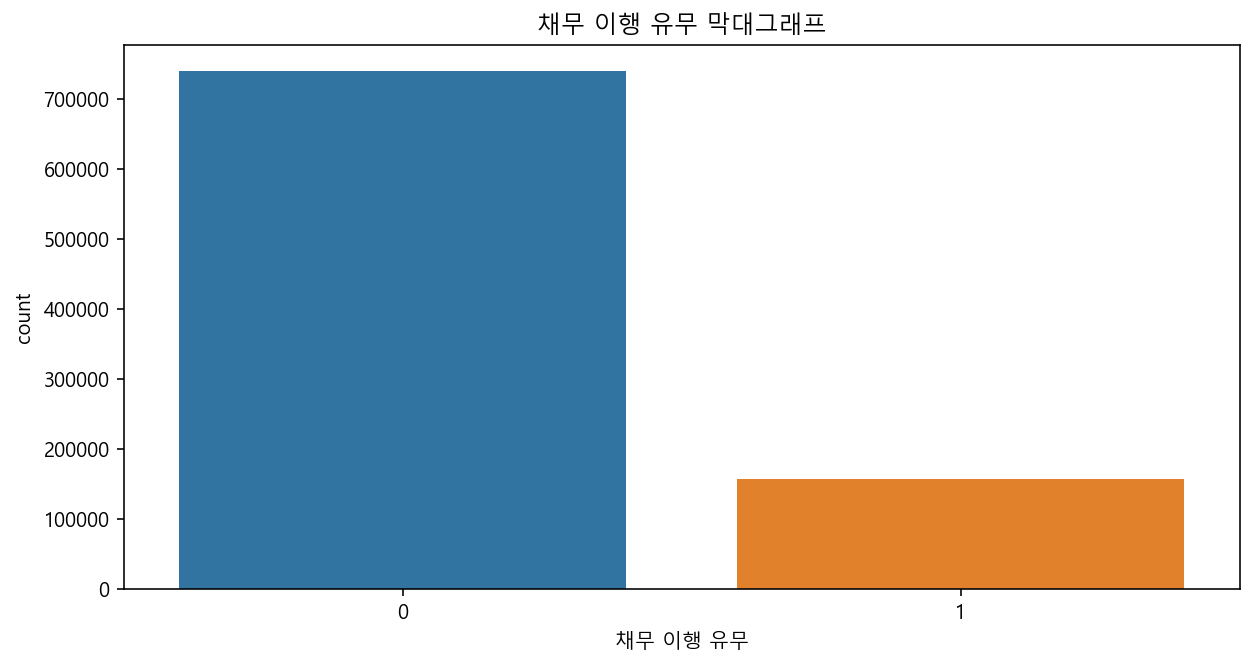

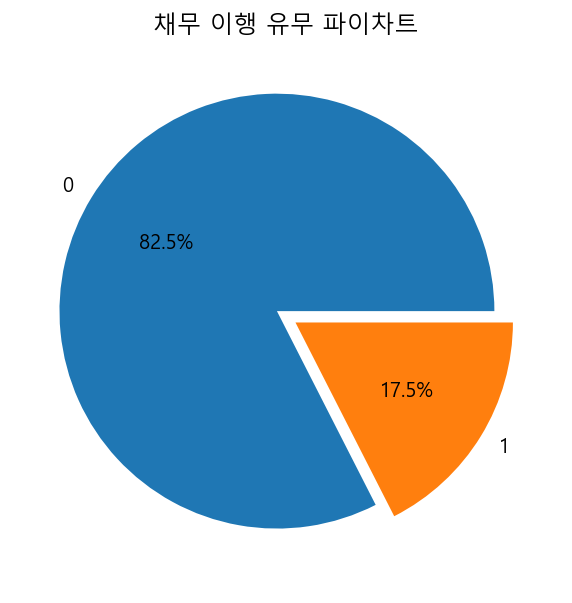

In [129]:
# 분포 확인하기
# 막대그래프
plt.figure(figsize=(10, 5))
sns.countplot(x='MIS_Status', data=df3)
plt.title('채무 이행 유무 막대그래프')
plt.xlabel('채무 이행 유무')
plt.show()

# 파이차트
plt.figure(figsize=(10, 5))
df3['MIS_Status'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%.1f%%')
plt.title('채무 이행 유무 파이차트')
plt.ylabel('')
plt.show()

=> 채무 이행 : 채무 불이행 = 약 8:2 정도로 불균형한 데이터임을 확인할 수 있다.

(2) LoanNr_ChkDgt : 고유 식별 키

In [134]:
df3['LoanNr_ChkDgt']

0         1000014003
1         1000024006
2         1000034009
3         1000044001
4         1000054004
             ...    
899159    9995573004
899160    9995603000
899161    9995613003
899162    9995973006
899163    9996003010
Name: LoanNr_ChkDgt, Length: 896480, dtype: int64

In [50]:
#'LoanNr_ChkDgt' 칼럼을 기준으로 중복된 값 확인
duplicate_rows = df3[df3.duplicated(['LoanNr_ChkDgt'], keep=False)]

if duplicate_rows.empty:
    print("중복된 고유 식별키가 없습니다.")
else:
    print("중복된 고유 식별키가 존재합니다.")
    print(duplicate_rows)

중복된 고유 식별키가 없습니다.


In [51]:
len(df3['LoanNr_ChkDgt'].unique())

896480

- 식별 키에 중복된 값이 없는 것을 확인할 수 있다.
- 고윳값의 개수와 전체 데이터 개수가 동일하므로 정상
- LoanNr_ChkDgt는 차용자 고유 ID로 index와 동일한 역할

(3) Name : 차용 기업명

In [53]:
df3.Name

0                         ABC HOBBYCRAFT
1            LANDMARK BAR & GRILLE (THE)
2                  WHITLOCK DDS, TODD M.
3          BIG BUCKS PAWN & JEWELRY, LLC
4            ANASTASIA CONFECTIONS, INC.
                       ...              
899159                      FABRIC FARMS
899160                      FABRIC FARMS
899161      RADCO MANUFACTURING CO.,INC.
899162             MARUTAMA HAWAII, INC.
899163    PACIFIC TRADEWINDS FAN & LIGHT
Name: Name, Length: 896480, dtype: object

In [54]:
len(df3['Name'].unique())

778064

=> 고윳값의 개수가 Name 데이터 개수(896480)와 다르므로 확인 필요.(2회 이상 빌린 기업이 있다는 뜻)

In [138]:
# 중복된 이름 추출
duplicate_names = df3[df3.duplicated(['Name'], keep=False)]
duplicate_names

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,229000,0,0,0,229000,229000
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,...,N,N,24-Jun-91,22-Jul-80,600000,0,1,208959,600000,499998
12,1000146010,CARVEL,APEX,NC,27502,STEARNS BK NATL ASSOC,MN,445299,7-Feb-06,2006,...,N,N,NaN,31-Mar-06,253400,0,0,0,253400,190050
15,1000244002,"ENVIRONMENTAL ROOFING SYSTEMS,",OKLAHOMA CITY,OK,73112,BANK OF AMERICA NATL ASSOC,NC,421330,28-Feb-97,1997,...,N,N,NaN,30-Sep-97,350000,0,0,0,350000,262500
18,1000284003,FANTASTIC SAMS,PLANO,TX,75093,NEWTEK SMALL BUS. FINANCE INC.,NY,0,28-Feb-97,1997,...,N,Y,NaN,31-May-97,57500,0,0,0,57500,46000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899152,9995403010,D D MUDD,IDAHO FALLS,ID,83405,BANK OF IDAHO,ID,0,27-Feb-97,1997,...,N,Y,NaN,31-Mar-97,38000,0,0,0,38000,30400
899154,9995423005,"LITWIN LIVERY SERVICES, INC.",CAMPBELL,OH,44405,JPMORGAN CHASE BANK NATL ASSOC,IL,0,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,10000,0,0,0,10000,5000
899157,9995493004,PULLTARPS MFG.,EL CAJON,CA,92020,U.S. BANK NATIONAL ASSOCIATION,CA,314912,27-Feb-97,1997,...,N,N,NaN,31-Mar-97,200000,0,0,0,200000,150000
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,70000,0,0,0,70000,56000


In [139]:
duplicate_names['Name'].value_counts()

SUBWAY                            1269
QUIZNO'S SUBS                      433
COLD STONE CREAMERY                366
QUIZNO'S                           345
DAIRY QUEEN                        328
                                  ... 
INFINITY HEALTH CARE                 2
GABRIELA GARDENS                     2
JAYBEES AUTO SERVICE                 2
KEN DAIGLE DBA KEN'S TECH SUPP       2
AMERICAN IMAGE INC                   2
Name: Name, Length: 72194, dtype: int64

In [14]:
# Name 빈도 중 가장 많은 값을 차지하고 있는 SUBWAY만 추출해보기
subway = df3[df3.Name == 'SUBWAY']
subway

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
24,1000446006,SUBWAY,LITTLE ROCK,AR,72223,HOPE FCU,MS,722211,7-Feb-06,2006,...,N,N,NaN,30-Apr-06,137300,0,0,0,137300,116705
3156,1020836002,SUBWAY,GLEN MILLS,PA,19342,"PNC BANK, NATIONAL ASSOCIATION",DE,722211,10-Feb-06,2006,...,0,N,NaN,31-Mar-06,50000,0,0,0,50000,25000
7461,1050586000,SUBWAY,MANCHESTER,ME,4351,BANGOR SAVINGS BANK,ME,722211,16-Feb-06,2006,...,0,N,NaN,31-Mar-06,102000,0,0,0,102000,86700
8287,1056105001,SUBWAY,NORWICH,CT,6360,BANK OF AMERICA NATL ASSOC,RI,722211,8-Sep-04,2004,...,Y,N,NaN,31-Oct-04,47000,0,0,0,47000,23500
10198,1071404010,SUBWAY,ATHENS,TX,75751,COMMUNITY NATL BK & TR OF TEXA,TX,0,1-Apr-97,1997,...,N,Y,NaN,30-Apr-97,77600,0,0,0,77600,62080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896071,9927733002,SUBWAY,NASHVILLE,TN,37219,FIRST TENNESSEE BANK NATL ASSO,TN,0,29-Jan-97,1997,...,N,Y,NaN,31-Jul-97,72000,0,0,0,72000,57600
898205,9975573007,SUBWAY,MEMPHIS,TN,38118,TRI-STATE BANK OF MEMPHIS,TN,0,20-Feb-97,1997,...,N,Y,NaN,31-Mar-99,100000,0,0,0,100000,80000
898282,9976863002,SUBWAY,EDMONDS,WA,98026,WELLS FARGO BANK NATL ASSOC,SD,0,20-Feb-97,1997,...,0,N,NaN,30-Jun-97,200000,0,0,0,200000,150000
898629,9984303009,SUBWAY,DURANT,OK,74701,LANDMARK BANK NATL ASSOC,OK,0,24-Feb-97,1997,...,N,Y,NaN,31-May-97,100000,0,0,0,100000,80000


In [15]:
# subway의 채무이행 : 채무불이행 빈도 확인
subway.MIS_Status.value_counts()

0    1203
1      66
Name: MIS_Status, dtype: int64

In [16]:
subway.City.value_counts()

CHICAGO         28
NEW YORK        17
INDIANAPOLIS    13
CHARLOTTE       13
COLUMBUS        11
                ..
CASCADE          1
FOX POINT        1
WOONSOCKET       1
CARTERET         1
TROY             1
Name: City, Length: 817, dtype: int64

In [17]:
subway.State.value_counts()

NY    98
PA    91
OH    78
TX    62
NJ    61
CA    61
MA    58
IL    51
IN    48
WA    47
WI    47
OK    47
NC    45
MO    39
FL    31
KY    28
AZ    26
KS    24
MI    22
VA    22
MD    21
GA    18
CT    16
RI    16
IA    15
MN    15
ID    15
CO    14
LA    14
AL    13
SC    12
MT    11
WV    10
TN    10
NE     9
NM     8
OR     8
SD     8
HI     8
AR     8
ME     6
NH     5
NV     4
ND     4
VT     3
DE     3
MS     3
UT     2
DC     2
AK     1
WY     1
Name: State, dtype: int64

In [19]:
subway.FranchiseCode.value_counts()

78760    1114
1         144
78759       5
0           3
21425       1
78755       1
78640       1
Name: FranchiseCode, dtype: int64

- SUBWAY는 프랜차이즈 기업인데 0과 1로 분류(프랜차이즈 아님)되어 있는 경우도 있음 => 시간 차이 때문에 그런 것인지?
- SUBWAY는 프랜차이즈 기업이므로 미국의 특정 도시나 주에만 있지 않은 것을 확인할 수 있다.

=> Name은 기업명에 대한 정보만 파악하는 정도로 사용할 것 같음

(4) City : 차용 기업이 위치한 city

In [63]:
df3.City

0              EVANSVILLE
1               NEW PARIS
2             BLOOMINGTON
3            BROKEN ARROW
4                 ORLANDO
               ...       
899159    UPPER ARLINGTON
899160           COLUMBUS
899161        SANTA MARIA
899162           HONOLULU
899163             KAILUA
Name: City, Length: 896480, dtype: object

In [64]:
df3.City.value_counts()

LOS ANGELES         11539
HOUSTON             10220
NEW YORK             7831
CHICAGO              6003
MIAMI                5590
                    ...  
HELLERSTOWN             1
Tuscarora               1
BEAVERDALE              1
Fort Myers Beach        1
Eagle Point             1
Name: City, Length: 32550, dtype: int64

=> City는 Name과 유사하게 기업이 위치한 도시에 대한 정보만 파악하는 정도로 사용할 것 같음

(5) State : 차용 기업이 위치한 state

In [65]:
df3.State

0         IN
1         IN
2         IN
3         OK
4         FL
          ..
899159    OH
899160    OH
899161    CA
899162    HI
899163    HI
Name: State, Length: 896480, dtype: object

In [66]:
df3.State.value_counts()

CA    130387
TX     70352
NY     57356
FL     41163
PA     34780
OH     32486
IL     29563
MA     25078
MN     24355
NJ     24007
WA     23231
GA     22260
WI     21020
MO     20626
CO     20583
MI     20493
UT     18752
AZ     17615
NC     14282
IN     14069
MD     13248
VA     13202
CT     12116
NH     12015
IA     11975
KS     11438
OR     11035
OK      9936
LA      9559
ID      9487
TN      9386
RI      8943
MT      8722
AL      8350
NV      8017
KY      7718
MS      7663
NE      6369
AR      6328
NM      6014
ME      5925
SC      5591
VT      5429
ND      5215
SD      4412
HI      3604
WV      3284
WY      2833
AK      2392
DE      2191
DC      1612
Name: State, dtype: int64

In [67]:
len(df3.State.value_counts())

51

=> 미국 주의 개수는 50개인데, 51개?

In [68]:
df_state = pd.DataFrame(df3.State.value_counts()).reset_index()
df_state.columns=['State','Count']
print(df_state)

   State   Count
0     CA  130387
1     TX   70352
2     NY   57356
3     FL   41163
4     PA   34780
5     OH   32486
6     IL   29563
7     MA   25078
8     MN   24355
9     NJ   24007
10    WA   23231
11    GA   22260
12    WI   21020
13    MO   20626
14    CO   20583
15    MI   20493
16    UT   18752
17    AZ   17615
18    NC   14282
19    IN   14069
20    MD   13248
21    VA   13202
22    CT   12116
23    NH   12015
24    IA   11975
25    KS   11438
26    OR   11035
27    OK    9936
28    LA    9559
29    ID    9487
30    TN    9386
31    RI    8943
32    MT    8722
33    AL    8350
34    NV    8017
35    KY    7718
36    MS    7663
37    NE    6369
38    AR    6328
39    NM    6014
40    ME    5925
41    SC    5591
42    VT    5429
43    ND    5215
44    SD    4412
45    HI    3604
46    WV    3284
47    WY    2833
48    AK    2392
49    DE    2191
50    DC    1612


In [69]:
df_state.sort_values(by='State')

,State,Count
48,AK,2392
33,AL,8350
38,AR,6328
17,AZ,17615
0,CA,130387
14,CO,20583
22,CT,12116
50,DC,1612
49,DE,2191
3,FL,41163


- DC는 워싱턴 DC로 미국 50개의 주에 포함되지 않고 미국의 수도로서 특별행정구를 의미. 미국 연방 정부가 위치한 지역
- WA는 미국 서북부 지역에 위치한 주로, 시애틀을 비롯한 주요 도시가 있음.

In [70]:
# State가 DC인 경우 City 확인해보기
df3[df3.State=='DC'].head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
1778,1011916000,COLD STONE CREAMERY,WASHINGTON,DC,20008,"PNC BANK, NATIONAL ASSOCIATION",DE,722310,9-Feb-06,2006,...,0,N,NaN,28-Feb-06,420000,0,0,0,420000,315000
1781,1011926003,COLD STONE CREAMERY,WASHINGTON,DC,20012,"PNC BANK, NATIONAL ASSOCIATION",DE,722310,9-Feb-06,2006,...,Y,N,5-Mar-09,30-Jun-06,19500,0,0,12608,15000,7500
2717,1018005005,Shooter's Inc,WASHINGTON,DC,20003,BANK OF AMERICA NATL ASSOC,NC,448150,28-Jun-04,2004,...,Y,N,NaN,31-Jul-04,124275,0,0,0,100000,50000
2777,1018376007,JARVAISE INC,WASHINGTON,DC,20009,"PNC BANK, NATIONAL ASSOCIATION",DE,424340,10-Feb-06,2006,...,0,N,24-Mar-11,31-Mar-06,225000,0,1,149350,225000,168750
3112,1020485008,Merrill M Schnipple dba George,WASHINGTON,DC,20024,BANK OF AMERICA NATL ASSOC,NC,325998,6-Jul-04,2004,...,Y,N,NaN,31-Jul-04,12697,0,0,0,10000,5000


In [71]:
df3[df3.State=='WA'].head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
66,1000764005,"LABELLE MARIEE, INC.",KIRKLAND,WA,98033,BANK OF AMERICA NATL ASSOC,WA,448120,28-Feb-97,1997,...,0,N,NaN,31-Dec-97,30000,0,0,0,30000,15000
83,1000836005,URBAN BEAST-SEATTLE LLC,SEATTLE,WA,98109,U.S. BANK NATIONAL ASSOCIATION,OH,453910,7-Feb-06,2006,...,0,N,24-May-10,31-Aug-06,28090,0,1,28090,28300,24055
92,1000915009,Christian Hinderer,Waterville,WA,98858,WELLS FARGO BANK NATL ASSOC,SD,422720,8-Apr-97,1997,...,0,N,NaN,30-Nov-97,4987,0,0,0,10000,5000
95,1000935004,Hairline Inc.,Vancouver,WA,98663,WELLS FARGO BANK NATL ASSOC,SD,0,8-Apr-97,1997,...,0,N,NaN,28-Feb-99,10000,0,0,0,10000,5000
103,1001015001,The Cheese Box,Moses Lake,WA,98837,WELLS FARGO BANK NATL ASSOC,SD,445310,21-Apr-97,1997,...,0,N,1-Oct-02,28-Feb-98,10000,0,1,9161,10000,5000


- State는 기업이 위치한 주에 대한 정보를 파악하는 정도로 사용할 예정
**BankState와 동일하면 0, 동일하지 않으면 1의 값을 가지는 파생변수 생성할 예정*

In [29]:
# State에 따른 MIS_Status 비율
state_mis_ratio = df3.groupby('State')['MIS_Status'].mean()
state_mis_ratio

State
AK    0.112876
AL    0.165150
AR    0.167351
AZ    0.207096
CA    0.184520
CO    0.177622
CT    0.139650
DC    0.239454
DE    0.178914
FL    0.273182
GA    0.239218
HI    0.151776
IA    0.114489
ID    0.140086
IL    0.225890
IN    0.175705
KS    0.129393
KY    0.193703
LA    0.179831
MA    0.129317
MD    0.196482
ME    0.096371
MI    0.225052
MN    0.116814
MO    0.151556
MS    0.158293
MT    0.066384
NC    0.192620
ND    0.072867
NE    0.112106
NH    0.106617
NJ    0.201025
NM    0.107416
NV    0.231758
NY    0.198968
OH    0.164286
OK    0.154489
OR    0.152424
PA    0.145716
RI    0.113049
SC    0.204078
SD    0.075476
TN    0.210952
TX    0.187855
UT    0.175768
VA    0.188002
VT    0.073678
WA    0.139641
WI    0.121741
WV    0.161084
WY    0.068479
Name: MIS_Status, dtype: float64

In [35]:
# 데이터프레임으로 생성
state_mis_df = pd.DataFrame({'State': state_mis_ratio.index, 'MIS_Ratio': state_mis_ratio.values})

# MIS_Ratio의 값이 0.2 이상인 경우만 추출
state_mis_df_2 = state_mis_df[state_mis_df['MIS_Ratio'] > 0.2]
state_mis_df_2.sort_values(by='MIS_Ratio', ascending=False) #채무 불이행 비율이 높은 순서대로 정렬

,State,MIS_Ratio
9,FL,0.273182
7,DC,0.239454
10,GA,0.239218
33,NV,0.231758
14,IL,0.225890
22,MI,0.225052
42,TN,0.210952
3,AZ,0.207096
40,SC,0.204078
31,NJ,0.201025


=> FL(플로리다), DC(워싱턴 D.C.), GA(조지아) 순으로 채무불이행률이 높게 나타났다.

<span style="color:Red">미국 지도에 시각화 시도 중</span>

In [27]:
# 미국 주(State) 경계를 포함하는 지도 데이터 로드
us_states_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# state_mis_ratio를 포함하는 데이터프레임 생성
state_mis_df = pd.DataFrame({'State': state_mis_ratio.index, 'MIS_Ratio': state_mis_ratio.values})

# 미국 지도와 state_mis_df를 결합
merged = us_states_map.merge(state_mis_df, left_on='name', right_index=True)

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [25]:
us_map

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [ ]:
# 시각화
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='MIS_Ratio', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.axis('off')
ax.set_title('MIS_Status Ratio by State')
plt.show()

(6) Zip : 차용 기업의 우편 번호

In [72]:
df3.Zip

0         47711
1         46526
2         47401
3         74012
4         32801
          ...  
899159    43221
899160    43221
899161    93455
899162    96830
899163    96734
Name: Zip, Length: 896480, dtype: int64

In [73]:
#'Zip' 칼럼을 기준으로 중복된 값 확인
duplicate_rows = df3[df3.duplicated(['Zip'], keep=False)]

if duplicate_rows.empty:
    print("중복된 고유 식별키가 없습니다.")
else:
    print("중복된 고유 식별키가 존재합니다.")
    display(duplicate_rows)

중복된 고유 식별키가 존재합니다.


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,60000,0,0,0,60000,48000
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,40000,0,0,0,40000,32000
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,287000,0,0,0,287000,215250
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,35000,0,0,0,35000,28000
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,229000,0,0,0,229000,229000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,70000,0,0,0,70000,56000
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,85000,0,0,0,85000,42500
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,300000,0,0,0,300000,225000
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,75000,0,1,46383,75000,60000


- 중복되는 우편 번호가 있는 것을 확인할 수 있다.
- 우편번호 별로 나눠보기(우편번호는 City, State, BankState, UrbanRural과 연관이 있을 거라고 예상됨)

In [74]:
df3.Zip.value_counts()

10001    930
90015    926
93401    756
90010    733
33166    671
        ... 
62829      1
44619      1
38476      1
42343      1
91366      1
Name: Zip, Length: 33588, dtype: int64

In [75]:
# Zip에서 빈도가 가장 높은 경우만 미리보기
display(df3[df3['Zip']==10001].head())
display(df3[df3['Zip']==93401].head())
display(df3[df3['Zip']==90015].head())

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
306,1002345008,"BACHRACH JACOBS SEARCH GROUP,",NEW YORK,NY,10001,"KEY DIRECT, A BRANCH OF",OH,0,7-Apr-98,1998,...,0,N,NaN,30-Jun-98,100000,0,0,0,100000,50000
2200,1014774009,"J.P.T. DESIGN TEAM, INC.",NEW YORK,NY,10001,BNB HANA BANK NATL ASSOC,NJ,422330,6-Mar-97,1997,...,0,N,NaN,30-Jun-97,50000,0,0,0,50000,40000
8194,1055576007,MEGACARE SERVICES INC,NEW YORK,NY,10001,JPMORGAN CHASE BANK NATL ASSOC,NV,561320,17-Feb-06,2006,...,Y,N,NaN,28-Feb-06,79634,0,0,0,30000,15000
8389,1056746001,SUPERIOR RESOURCE PRINTING & G,NEW YORK,NY,10001,"CITIBANK, N.A.",NY,323115,17-Feb-06,2006,...,Y,N,NaN,28-Feb-06,99900,0,0,0,50000,25000
8933,1061494000,"MEYER JEGER,ESQ",NEW YORK,NY,10001,JPMORGAN CHASE BANK NATL ASSOC,IL,541110,24-Mar-97,1997,...,0,N,NaN,30-Jun-97,35000,0,0,0,35000,17500


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
4846,1033265000,"A. Owen Company, Inc.",SAN LUIS OBISPO,CA,93401,BANK OF AMERICA NATL ASSOC,NC,722211,3-Aug-04,2004,...,Y,N,NaN,31-Oct-04,10000,0,0,0,10000,5000
4873,1033415008,"Anthony O. Company, Inc.",SAN LUIS OBISPO,CA,93401,BANK OF AMERICA NATL ASSOC,NC,722211,3-Aug-04,2004,...,Y,N,NaN,31-Jan-05,10000,0,0,0,10000,5000
4885,1033474008,TRIPLETT HARPS,SAN LUIS OBISPO,CA,93401,MUFG UNION BANK NATL ASSOC,CA,451140,13-Mar-97,1997,...,N,N,NaN,31-May-97,184100,0,0,0,184144,138108
15358,1111324005,MEASUREMENT TECHNOLOGIES,SAN LUIS OBISPO,CA,93401,MUFG UNION BANK NATL ASSOC,CA,334513,9-Apr-97,1997,...,0,N,1-Oct-02,30-Jun-97,150000,0,0,99203,150000,112500
16040,1116595000,Reid's Autobody Incorporated,San Luis Obispo,CA,93401,CAPITAL ONE NATL ASSOC,VA,811111,1-Dec-04,2005,...,N,N,NaN,31-Dec-04,35000,0,0,0,35000,17500


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
1006,1006966010,CARE LOVE MEDICAL CENTER,LOS ANGELES,CA,90015,OPEN BANK,CA,621310,8-Feb-06,2006,...,Y,N,16-Jan-08,28-Feb-06,330000,0,1,200000,200000,100000
1937,1012994001,ASRIEL FASHION/SENSHI OF CALIF,LOS ANGELES,CA,90015,BBCN BANK,CA,0,5-Mar-97,1997,...,0,N,NaN,30-Apr-97,185000,0,0,0,185000,138750
2719,1018035003,Hebron Textile Corporation,LOS ANGELES,CA,90015,BANK OF AMERICA NATL ASSOC,NC,448120,28-Jun-04,2004,...,Y,N,NaN,31-Jul-04,100000,0,0,0,100000,50000
3022,1019835009,"Angelica Fashions, Corp",LOS ANGELES,CA,90015,BANK OF AMERICA NATL ASSOC,NC,448120,2-Jul-04,2004,...,Y,N,NaN,30-Nov-04,10000,0,0,0,10000,5000
3141,1020696008,TALENT INTERNATIONAL INC,LOS ANGELES,CA,90015,MUFG UNION BANK NATL ASSOC,CA,424990,10-Feb-06,2006,...,Y,N,NaN,31-Mar-06,52000,0,0,0,50000,25000


=> Zip의 빈도가 가장 높은 10001은 뉴욕, 다음으로 높은 93401은 샌 루이스 오비스포(캘리포니아), 90015는 LA(캘리포니아)임을 알 수 있음.

(7) Bank : 은행명

In [76]:
df3.Bank

0                       FIFTH THIRD BANK
1                        1ST SOURCE BANK
2                GRANT COUNTY STATE BANK
3          1ST NATL BK & TR CO OF BROKEN
4                FLORIDA BUS. DEVEL CORP
                       ...              
899159    JPMORGAN CHASE BANK NATL ASSOC
899160    JPMORGAN CHASE BANK NATL ASSOC
899161    RABOBANK, NATIONAL ASSOCIATION
899162                    BANK OF HAWAII
899163              CENTRAL PACIFIC BANK
Name: Bank, Length: 896480, dtype: object

In [77]:
df3.Bank.value_counts()

BANK OF AMERICA NATL ASSOC        86687
WELLS FARGO BANK NATL ASSOC       63391
JPMORGAN CHASE BANK NATL ASSOC    48103
U.S. BANK NATIONAL ASSOCIATION    35078
CITIZENS BANK NATL ASSOC          33766
                                  ...  
FREDERICK COUNTY BANK                 1
HOLMES COUNTY BANK & TRUST CO.        1
FDIC/NBC BANK-MISSION                 1
HEARTLAND BANCSHARES, INC             1
FDIC/BANK OF RUIDOSO                  1
Name: Bank, Length: 5784, dtype: int64

- NATIONAL BANK가 빈도가 많다. 규모가 큰 은행이 자산이 많고, 차용자는 규모가 큰 은행을 선호하기 때문이라고 추측됨  
- Bank의 경우, 은행명에 대한 정보를 파악하는 정도로만 사용할 예정. 추후 은행의 특성, 규모 등까지 생각할 수도 있다.

(8) BankState

In [78]:
df3.BankState

0         OH
1         IN
2         IN
3         OK
4         FL
          ..
899159    IL
899160    IL
899161    CA
899162    HI
899163    HI
Name: BankState, Length: 896480, dtype: object

In [79]:
# BankState과 State이 동일한지 확인해보기
diff_state = df3[df3['State'] != df3['BankState']]
diff_state

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,60000,0,0,0,60000,48000
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,...,N,N,NaN,30-Jun-97,517000,0,0,0,517000,387750
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,...,N,N,24-Jun-91,22-Jul-80,600000,0,1,208959,600000,499998
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,...,N,Y,NaN,30-Jun-98,45000,0,0,0,45000,36000
10,1000134004,COMMERCIAL TRUCKING MAINTENANC,CHARLOTTE,NC,28256,SUNTRUST BANK,GA,811111,28-Feb-97,1997,...,N,Y,NaN,23-Feb-98,70000,0,0,0,70000,56000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899150,9995383006,SHARON HATFIELD & KENNETH CHIP,CHARLESTON,SC,29412,BANK OF AMERICA NATL ASSOC,MD,114210,27-Feb-97,1997,...,0,N,NaN,31-Jul-98,45000,0,0,0,45000,22500
899154,9995423005,"LITWIN LIVERY SERVICES, INC.",CAMPBELL,OH,44405,JPMORGAN CHASE BANK NATL ASSOC,IL,0,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,10000,0,0,0,10000,5000
899158,9995563001,SHADES WINDOW TINTING AUTO ALA,IRVING,TX,75062,LOANS FROM OLD CLOSED LENDERS,DC,0,27-Feb-97,1997,...,N,Y,NaN,30-Jun-97,79000,0,0,0,79000,63200
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,70000,0,0,0,70000,56000


- 차용 기업이 위치한 State와 BankState가 대부분 동일할 거라고 생각했는데, 예상 외로 기업이 위치한 State와 BankState가 다른 경우가 약 42만 건이나 있음.
- <span style="color:Red">왜??</span>

In [53]:
# State와 BankState가 동일하지 않으면 0, 동일하면 1의 값을 가지는 파생변수 만들기
df3['SameState'] = (df3['State'] == df3['BankState']).astype(int)

In [71]:
display(df3[df3['SameState']==0].head()) 
display(df3[df3['SameState']==1].head())

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,SameState
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,Y,NaN,28-Feb-99,60000,0,0,0,60000,48000,0
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,...,N,NaN,30-Jun-97,517000,0,0,0,517000,387750,0
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,...,N,24-Jun-91,22-Jul-80,600000,0,1,208959,600000,499998,0
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,...,Y,NaN,30-Jun-98,45000,0,0,0,45000,36000,0
10,1000134004,COMMERCIAL TRUCKING MAINTENANC,CHARLOTTE,NC,28256,SUNTRUST BANK,GA,811111,28-Feb-97,1997,...,Y,NaN,23-Feb-98,70000,0,0,0,70000,56000,0


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,SameState
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,Y,NaN,31-May-97,40000,0,0,0,40000,32000,1
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,NaN,31-Dec-97,287000,0,0,0,287000,215250,1
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,Y,NaN,30-Jun-97,35000,0,0,0,35000,28000,1
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,NaN,14-May-97,229000,0,0,0,229000,229000,1
8,1000104006,TURTLE BEACH INN,PORT SAINT JOE,FL,32456,CENTENNIAL BANK,FL,721310,28-Feb-97,1997,...,N,NaN,31-Jul-97,305000,0,0,0,305000,228750,1


(9) NAICS

In [86]:
df3.NAICS

0         451120
1         722410
2         621210
3              0
4              0
           ...  
899159    451120
899160    451130
899161    332321
899162         0
899163         0
Name: NAICS, Length: 896480, dtype: int64

In [87]:
# 어떤 분류 코드가 제일 많은지 확인
df3.NAICS.value_counts()

0         201099
722110     27940
722211     19434
811111     14528
621210     14032
           ...  
221114         1
111992         1
333413         1
313310         1
111336         1
Name: NAICS, Length: 1312, dtype: int64

**=> 분류코드가 0인 경우가 20만개로 전체 데이터의 약 20%을 차지.**

In [12]:
# 분류코드가 0인 경우만 추출
df3[df3.NAICS==0]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,35000,0,0,0,35000,28000
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,229000,0,0,0,229000,229000
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,...,N,N,24-Jun-91,22-Jul-80,600000,0,1,208959,600000,499998
9,1000124001,INTEXT BUILDING SYS LLC,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,28-Feb-97,1997,...,N,Y,NaN,30-Apr-97,70000,0,0,0,70000,56000
13,1000154010,"ORCHARD CAFE & BAKERY, INC.",SLATERSVILLE,RI,2876,CITIZENS BANK NATL ASSOC,RI,0,28-Feb-97,1997,...,N,N,NaN,31-May-97,370000,0,0,0,370000,277500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899152,9995403010,D D MUDD,IDAHO FALLS,ID,83405,BANK OF IDAHO,ID,0,27-Feb-97,1997,...,N,Y,NaN,31-Mar-97,38000,0,0,0,38000,30400
899154,9995423005,"LITWIN LIVERY SERVICES, INC.",CAMPBELL,OH,44405,JPMORGAN CHASE BANK NATL ASSOC,IL,0,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,10000,0,0,0,10000,5000
899158,9995563001,SHADES WINDOW TINTING AUTO ALA,IRVING,TX,75062,LOANS FROM OLD CLOSED LENDERS,DC,0,27-Feb-97,1997,...,N,Y,NaN,30-Jun-97,79000,0,0,0,79000,63200
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,75000,0,1,46383,75000,60000


In [13]:
display(df3[df3.NAICS==722110].head())
display(df3[df3.NAICS==811111].head())

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
123,1001116003,ONE BITE JAPANESE GRILL,OVERLAND PARK,KS,66213,VALLEY VIEW STATE BANK,KS,722110,7-Feb-06,2006,...,N,N,NaN,31-Mar-06,95000,0,0,0,95000,80750
224,1001786005,505 MENDOCINO AVENUE,SANTA ROSA,CA,95401,SAFE-BIDCO,CA,722110,7-Feb-06,2006,...,N,N,5-May-10,31-Mar-06,250000,0,1,234033,250000,187500
388,1002926001,O YA LLC,BOSTON,MA,2111,CITIZENS BANK NATL ASSOC,RI,722110,7-Feb-06,2006,...,N,N,NaN,31-May-06,450000,0,0,0,450000,337500
404,1003086000,FAIRNMAR ORIGINAL WHOPPA INC,LYNBROOK,NY,11563,BBCN BANK,CA,722110,7-Feb-06,2006,...,0,N,2-May-08,28-Feb-06,5000,0,1,4314,5000,4250
411,1003136002,THE ORIGINAL ITALIAN PIE,SLIDELL,LA,70458,FIRST A NATL BK. ASSOC,LA,722110,7-Feb-06,2006,...,0,N,NaN,31-Jul-06,120000,0,0,0,120000,102000


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
10,1000134004,COMMERCIAL TRUCKING MAINTENANC,CHARLOTTE,NC,28256,SUNTRUST BANK,GA,811111,28-Feb-97,1997,...,N,Y,NaN,23-Feb-98,70000,0,0,0,70000,56000
70,1000785007,Baltazar Garza,Fresno,CA,93612,WELLS FARGO BANK NATL ASSOC,SD,811111,1-Apr-97,1997,...,0,N,NaN,31-Aug-02,10000,0,0,0,10000,5000
131,1001154001,ALL TUNE & LUBE CENTER #1148,GARDEN GROVE,CA,92644,"READYCAP LENDING, LLC",CA,811111,28-Feb-97,1997,...,0,N,NaN,31-May-97,95000,0,0,0,95000,76000
163,1001344010,AUTOMOTIVE SPECIALTIES,GLEN GARDER,NJ,8826,"TD BANK, NATIONAL ASSOCIATION",NJ,811111,28-Feb-97,1997,...,0,N,NaN,30-Jun-97,700000,0,0,0,700000,525000
355,1002666006,"AGN COMPANY, LLC.",ROCK HILL,SC,29732,FIRST BANK,MO,811111,7-Feb-06,2006,...,N,N,26-Mar-12,31-Mar-06,126353,0,1,116869,149000,126650


- 0이 가장 많은데, 분류가 아직 안된 것 같음 (1차 전처리 과정에서 산업 분류를 다시 할 필요가 있어보임!)
- 다음으로 많은 것은 72로 시작하는 숙박시설 및 음식점, 81로 시작하는 기타 서비스(공공서비스 제외)이다.
- <span style="color:Blue">산업코드 기준으로 State가 가장 높은 걸 구하고, 그 값으로 대체(ex. 제조업이 가장 높은 State가 DC라면 DC인 행의 NAICS를 제조업으로 채우기)</span>

(10) ApprovalDate : SBA 약정 발행 날짜

In [16]:
df3.ApprovalDate

0         28-Feb-97
1         28-Feb-97
2         28-Feb-97
3         28-Feb-97
4         28-Feb-97
            ...    
899159    27-Feb-97
899160    27-Feb-97
899161    27-Feb-97
899162    27-Feb-97
899163    27-Feb-97
Name: ApprovalDate, Length: 896480, dtype: object

In [55]:
# 일별로 쪼개보기
# ApprovalDate 변수를 datetime 형식으로 변환
df3['ApprovalDate'] = pd.to_datetime(df3['ApprovalDate'], format='%d-%b-%y')
df3['ApprovalDate'].dt.day.value_counts().sort_index()

1     23573
2     26961
3     26985
4     26021
5     26894
6     29032
7     30537
8     29663
9     30342
10    29193
11    26814
12    29953
13    29323
14    30469
15    29040
16    30020
17    29189
18    29995
19    29854
20    29938
21    30451
22    30137
23    30337
24    30089
25    28518
26    29208
27    30890
28    31671
29    30304
30    32676
31    18403
Name: ApprovalDate, dtype: int64

=> 모든 day에 대해 비슷한 빈도를 보이므로 특정 day에만 발행해주는 게 아니라는 것을 확인할 수 있음.

In [56]:
# 월별로 쪼개보기
df3['Month'] = df3['ApprovalDate'].dt.month

# 월별 빈도 분석
df3['Month'].value_counts().sort_index()

1     66853
2     66132
3     83352
4     79962
5     76993
6     78093
7     76272
8     78565
9     82733
10    69575
11    68215
12    69735
Name: Month, dtype: int64

=> 모든 month에 대해 비슷한 빈도를 보이므로 특정 month에만 발행해주는 게 아니라는 것을 확인할 수 있음.

In [57]:
# 연도별로 쪼개보기
df3['Year'] = df3['ApprovalDate'].dt.year

# 연도별 빈도 분석
df3['Year'].value_counts().sort_values(ascending=False)

2006    77006
2005    74562
2004    71119
2007    66793
2003    62082
2002    47374
1995    41754
1996    40751
2001    38323
1997    37713
1999    37674
1994    36989
2000    36766
1998    35767
2008    30729
1993    25006
1992    21091
2009    19672
2010    16757
1991    16449
1990    14949
1989    13533
2011     9658
2012     5048
1988     4295
1986     2166
1987     2103
1984     1965
1985     1941
1983     1804
2013     1730
1982      831
1981      554
1980      482
1979      305
1978      237
2014      128
1977      119
1976       75
1975       40
1972       39
1973       37
1974       28
1970       18
1971       12
1969        3
2068        2
2066        1
Name: Year, dtype: int64

- 2000년대 초중반(글로벌금융위기 직전)에 SBA 약정이 발행된 경우가 가장 많았음.
- 2066, 2068은 이상치인 것 같다. => 제거하기

In [58]:
df3 = df3[(df3['Year'] != 2066) & (df3['Year'] != 2068)]
df3.Year.value_counts()

2006    77006
2005    74562
2004    71119
2007    66793
2003    62082
2002    47374
1995    41754
1996    40751
2001    38323
1997    37713
1999    37674
1994    36989
2000    36766
1998    35767
2008    30729
1993    25006
1992    21091
2009    19672
2010    16757
1991    16449
1990    14949
1989    13533
2011     9658
2012     5048
1988     4295
1986     2166
1987     2103
1984     1965
1985     1941
1983     1804
2013     1730
1982      831
1981      554
1980      482
1979      305
1978      237
2014      128
1977      119
1976       75
1975       40
1972       39
1973       37
1974       28
1970       18
1971       12
1969        3
Name: Year, dtype: int64

In [62]:
# Recession 파생 변수 만들기 : 글로벌 금융위기에 해당하는 경우(1), 글로벌 금융위기에 해당하지 않는 경우(0) 
df3['Recession'] = (df3['ApprovalDate'].dt.year.between(2007, 2009)) & (df3['ApprovalDate'].dt.month.between(12, 12) | df3['ApprovalDate'].dt.year.between(2008, 2009) & df3['ApprovalDate'].dt.month.between(1, 6)).astype(int)

In [63]:
df3.Recession = df3.Recession.astype(int)

In [64]:
df3.Recession.value_counts()

0    860663
1     35814
Name: Recession, dtype: int64

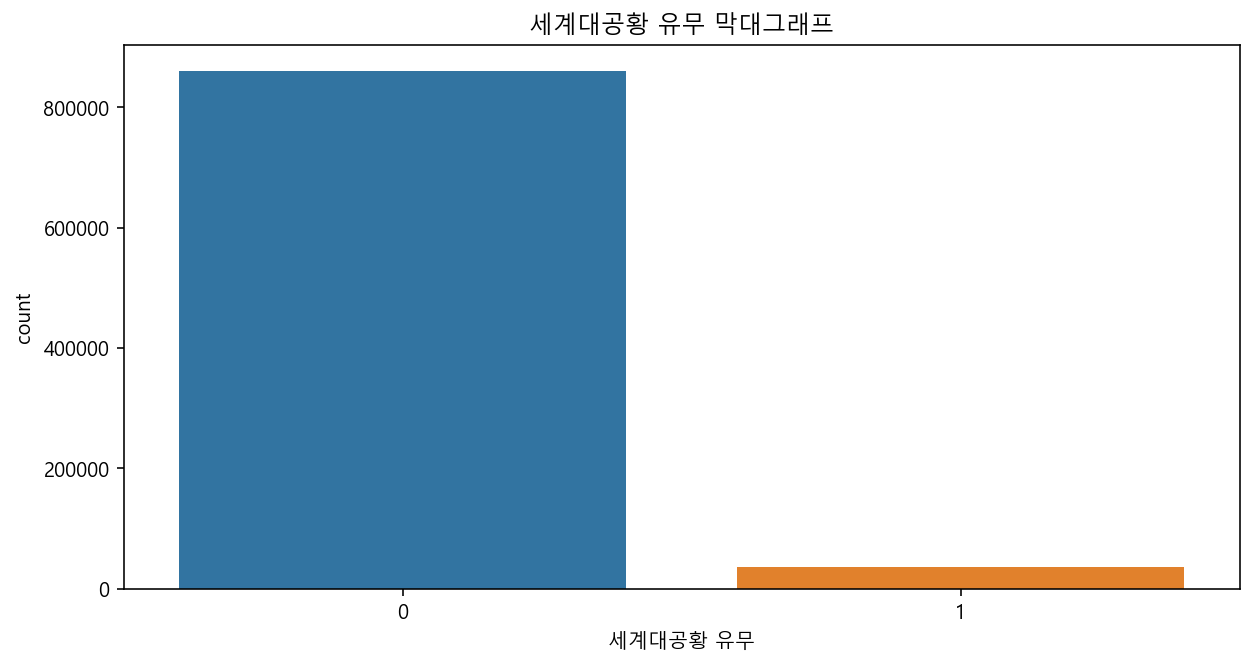

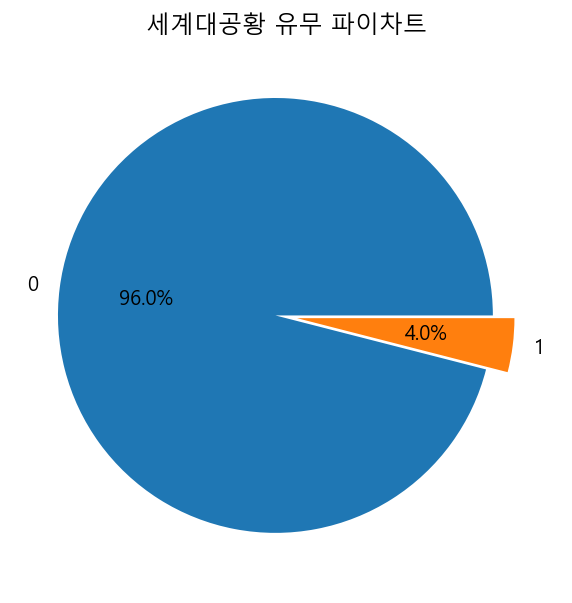

In [86]:
# 분포 확인하기
# 막대그래프
plt.figure(figsize=(10, 5))
sns.countplot(x='Recession', data=df3)
plt.title('세계대공황 유무 막대그래프')
plt.xlabel('세계대공황 유무')
plt.show()

# 파이차트
plt.figure(figsize=(10, 5))
df3['Recession'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%.1f%%')
plt.title('세계대공황 유무 파이차트')
plt.ylabel('')
plt.show()

(11) ApprovalFY : 약정 회계 연도

In [18]:
df3.ApprovalFY

0         1997
1         1997
2         1997
3         1997
4         1997
          ... 
899159    1997
899160    1997
899161    1997
899162    1997
899163    1997
Name: ApprovalFY, Length: 896480, dtype: object

In [19]:
# SBA 약정 발행 연도와 다른 행이 있는지 확인
df3['ApprovalFY'] = df3['ApprovalFY'].astype(int) #데이터 유형 통일
df3[df3['Year'] != df3['ApprovalFY']]

ValueError: invalid literal for int() with base 10: '1976A'

In [65]:
# 회계연도에 1976A와 같이 문자형이 있는 것 같아 확인
df3[df3['ApprovalFY'].str.contains('[A-Za-z]')]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,SameState,Month,Year,Recession
699732,7268591001,FASHION NOVELTY CORP OF NJ,CARLSTADT,NJ,7072,VALLEY NATIONAL BANK,NJ,0,1976-09-29,1976A,...,350000,0,1,48361,350000,315000,1,9,1976,0
704030,7319361003,J W HUGHES HUGHES 66 GLDN PLNS,FOLLETT,TX,79034,FIRSTBANK SOUTHWEST,TX,0,1976-09-17,1976A,...,325000,0,1,45910,325000,292500,1,9,1976,0
710381,7389331000,BAUMAN'S APPLIANCE,ODESSA,NY,14869,CHEMUNG CANAL TRUST COMPANY,NY,0,1976-07-19,1976A,...,15000,0,1,475,15000,13500,1,7,1976,0
713245,7420741004,THE TOGGERY,SPRINGFIELD,MA,1103,BANK OF AMERICA NATL ASSOC,RI,0,1976-08-30,1976A,...,73000,0,1,827,73000,40150,0,8,1976,0
748029,7799101004,"JUSTIN TYME,INC.",COLUMBUS,OH,43265,"PNC BANK, NATIONAL ASSOCIATION",OH,0,1976-08-20,1976A,...,150000,0,1,87037,150000,135000,1,8,1976,0
751519,7848911008,MICHAELS TRUCK STOP,CHICAGO,IL,60633,BANK OF AMERICA NATL ASSOC,NC,0,1976-09-29,1976A,...,550000,0,1,572877,550000,495000,0,9,1976,0
769515,8108191005,MIKE ESPARZA FUNERAL HOME,UVALDE,TX,78801,BANK OF AMERICA NATL ASSOC,TX,0,1976-07-19,1976A,...,85000,0,1,63850,85000,76500,1,7,1976,0
775002,8191291000,JUG & JIGGER,YUCAIPA,CA,92399,BANK OF AMERICA NATL ASSOC,CA,0,1976-08-20,1976A,...,94500,0,1,63182,94500,85050,1,8,1976,0
775430,8197661005,FANGMAN CABINET SHOP,DYERSVILLE,IA,52040,FDIC/DYERSVILLE,IL,0,1976-08-26,1976A,...,72000,0,0,8509,72000,64800,0,8,1976,0
775978,8204371000,AUTOMOTIVE ELECTRIC REBUILDERS,FAIRBANKS,AK,99701,KEYBANK NATIONAL ASSOCIATION,OR,0,1976-09-01,1976A,...,164679,0,1,439,165000,148500,0,9,1976,0


=> 1976A를 1976으로 바꿔도 되지 않을까?

In [66]:
df3['ApprovalFY'] = df3['ApprovalFY'].replace('1976A', '1976')

In [67]:
# SBA 약정 발행 연도와 다른 행이 있는지 확인
df3['ApprovalFY'] = df3['ApprovalFY'].astype(int) #데이터 유형 통일
df3[df3['Year'] != df3['ApprovalFY']]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,SameState,Month,Year,Recession
44,1000655003,Sun Service Center,Newburgh,NY,12550,WELLS FARGO BANK NATL ASSOC,SD,0,1996-10-04,1997,...,25000,0,0,0,25000,12500,0,10,1996,0
222,1001775006,Independent Computer Services,Watertown (Town of),MA,2172,BANK OF AMERICA NATL ASSOC,RI,0,1997-10-09,1998,...,10000,0,0,0,10000,5000,0,10,1997,0
223,1001785009,West Reading Used Furniture,West Reading,PA,19611,WELLS FARGO BANK NATL ASSOC,PA,0,1997-10-10,1998,...,20000,0,0,0,20000,10000,1,10,1997,0
226,1001795001,"Real Time Executives, Inc.",Wrentham (census name Wrentham,MA,2093,BANK OF AMERICA NATL ASSOC,RI,541511,1997-10-10,1998,...,25000,0,0,0,25000,12500,0,10,1997,0
227,1001805002,Tola Painting,Hartford,CT,6114,BANK OF AMERICA NATL ASSOC,RI,235210,1997-10-14,1998,...,10000,0,0,0,10000,5000,0,10,1997,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893534,9874313000,THE MONROVIAN FAMILY RESTAURAN,MONROVIA,CA,92407,CITIZENS BUSINESS BANK,CA,0,1996-12-31,1997,...,400000,0,0,0,400000,256000,1,12,1996,0
893535,9874323003,THE MONROVIAN FAMILY RESTAURAN,MONROVIA,CA,91016,CITIZENS BUSINESS BANK,CA,0,1996-12-31,1997,...,215000,0,0,0,215000,161250,1,12,1996,0
893537,9874343009,"DAIZEN, INC.",KAMUELA,HI,96743,FIRST HAWAIIAN BANK,HI,0,1996-12-31,1997,...,46000,0,0,0,46000,36800,1,12,1996,0
898351,9978031001,ONE STOP SUPPLY,WARWICK,RI,2888,OCEAN ST. BUS. DEVEL AUTHORITY,RI,0,1981-10-19,1982,...,135000,0,0,0,135000,135000,1,10,1981,0


=> 회계연도와 SBA 약정 발행 연도가 다른 경우 약 2만 7천 건 존재.(크게 중요해보이진 않음.)

In [68]:
# Month와 Year 변수 삭제
df3.drop(columns=['Month', 'Year'], inplace=True)

(12) NewExist : 1 = 기존 비즈니스, 2 = 신규 비즈니스(NA 존재)

In [69]:
df3.NewExist

0         2.0
1         2.0
2         1.0
3         1.0
4         1.0
         ... 
899159    1.0
899160    1.0
899161    1.0
899162    1.0
899163    2.0
Name: NewExist, Length: 896477, dtype: float64

In [70]:
df3.NewExist.value_counts()

1.0    642983
2.0    252337
0.0      1023
Name: NewExist, dtype: int64

**=> 0은 무엇을 의미?**

In [71]:
# 예전 데이터라 기존 비즈니스인지, 신규인지 알 수 없는 경우인가?
df3[df3.NewExist == 0]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,SameState,Recession
142,1001235008,"NEW ENGLAND PAINT & SUPPLY, IN",READING (TOWN OF),MA,1867,DANVERSBANK,MA,0,1997-05-21,1997,...,NaN,31-Mar-99,100000,0,0,0,100000,50000,1,0
170,1001385007,Mill City Club,Lawrence,MA,1841,BANK OF AMERICA NATL ASSOC,NC,722410,1997-06-16,1997,...,NaN,30-Nov-97,70000,0,0,0,70000,35000,0,0
185,1001485002,"LBC BILLING, LLC",PROVIDENCE,RI,2908,BANK OF AMERICA NATL ASSOC,NC,514210,1997-07-02,1997,...,NaN,30-Apr-99,10000,0,0,0,10000,5000,0,0
211,1001685003,Comprehensive Psychiatric Asso,Weston (Town of),MA,2193,BANK OF AMERICA NATL ASSOC,NC,0,1997-09-19,1997,...,NaN,30-Nov-97,100000,0,0,0,100000,50000,0,0
223,1001785009,West Reading Used Furniture,West Reading,PA,19611,WELLS FARGO BANK NATL ASSOC,PA,0,1997-10-10,1998,...,NaN,30-Apr-98,20000,0,0,0,20000,10000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895872,9923063005,"VAN-JONES HARDWOOD CO., INC",CRYSTAL SPRING,PA,15536,FARMERS & MERCHANTS TR CO,PA,421310,1997-01-27,1997,...,NaN,28-Feb-97,250000,0,0,0,250000,225000,1,0
895976,9925253007,"ACO ENTERPRISES, INC.",SALT LAKE CITY,UT,84050,WELLS FARGO BANK NATL ASSOC,SD,316991,1997-01-28,1997,...,NaN,28-Feb-97,50000,0,0,0,50000,45000,0,0
896382,9933633003,"FIRST CLASS TAN, INC.",HOT SPRINGS,AR,71913,BANK OF AMERICA NATL ASSOC,AR,0,1997-01-30,1997,...,NaN,28-Feb-97,18700,0,0,0,23000,18400,1,0
896633,9939223010,BO SHANNON GRAPHIC PRODUCTION,LEE'S SUMMIT,MO,64064,COUNTRY CLUB BANK,KS,0,1997-02-03,1997,...,NaN,30-Jun-97,60000,0,0,0,60000,48000,0,0


In [92]:
# NA 확인
df3[df3['NewExist'].isna()]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,SameState,Recession
395231,3808405000,J.W.Chipping Corp,BETHLEHEM,NH,3574,FIRST COLEBROOK BANK,NH,423310,2009-12-15,2010,...,NaN,15-Dec-09,117000,0,0,0,117000,99450,1,1
399884,3854945010,D & R Foods Inc.,INDIANOLA,MS,38751,TRUSTMARK NATIONAL BANK,MS,445110,2010-01-13,2010,...,NaN,1-Feb-10,150000,0,0,0,150000,135000,1,0
400052,3856405005,"Luna Design Group, Inc.",LYNNFIELD,MA,1940,PEOPLE'S UNITED BANK,CT,541310,2010-01-14,2010,...,NaN,25-Mar-10,25000,0,0,0,25000,25000,0,0
400203,3857955008,Lisbon Market Inc,LISBON,OH,44432,THE CITIZENS SAVINGS BANK,OH,445110,2010-01-15,2010,...,NaN,15-Jan-10,350000,0,0,0,350000,175000,1,0
400300,3858915009,"George F. Gales, Jr. MD",QUINCY,MA,2170,EASTERN BANK,MA,621111,2010-01-15,2010,...,NaN,1-Apr-10,52395,0,0,0,50000,25000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470308,4540125002,"GG&M, LLC",GENESEE,ID,83832,ZIONS FIRST NATIONAL BANK,UT,424410,2011-02-10,2011,...,28-Feb-13,10-Feb-11,21176,0,1,12842,15000,7500,0,0
471939,4553585010,"MORGAN VENTURES, INC",COLLINS,MS,39428,COVINGTON COUNTY BANK,MS,722110,2011-02-23,2011,...,NaN,23-Feb-11,20500,0,0,0,20500,17425,1,0
498244,4820745005,Goodcare LLC,DELL RAPIDS,SD,57022,MINNWEST BANK,SD,624310,2011-08-12,2011,...,NaN,19-Aug-11,129717,0,0,0,100000,50000,1,0
512594,4957935004,"912 Enterprises Franchising, I",CRANBERRY TWP,PA,16066,FIRST COMMONWEALTH BANK,PA,311520,2011-11-16,2012,...,NaN,16-Nov-11,43000,0,0,0,43000,21500,1,0


In [72]:
# NewExist 칼럼이 보이지 않으므로 해당 열만 출력
df3.loc[df3['NewExist'].isna(), 'NewExist']

395231   NaN
399884   NaN
400052   NaN
400203   NaN
400300   NaN
          ..
470308   NaN
471939   NaN
498244   NaN
512594   NaN
611835   NaN
Name: NewExist, Length: 134, dtype: float64

- **NewExist에 NA가 134개, 0인 경우 1026개 있는데 삭제?**
- **전체 데이터의 약 0.1% 이므로 일단 삭제하기로 하였음**

In [73]:
df3 = df3[(df3['NewExist'] != 0) & (~df3['NewExist'].isna())] #0이 아닌 경우와 na가 아닌 경우만 남기기

In [74]:
df3.shape

(895320, 29)

In [75]:
# 기존 비즈니스(1)과 신규 비즈니스(2)를 각각 0과 1로 재분류
df3['NewExist'] = df3['NewExist'].replace({1: 0, 2: 1})
df3.NewExist.value_counts()

0.0    642983
1.0    252337
Name: NewExist, dtype: int64

In [76]:
# 소수점 제거
df3['NewExist'] = df3['NewExist'].astype(int)
df3.NewExist.value_counts()

0    642983
1    252337
Name: NewExist, dtype: int64

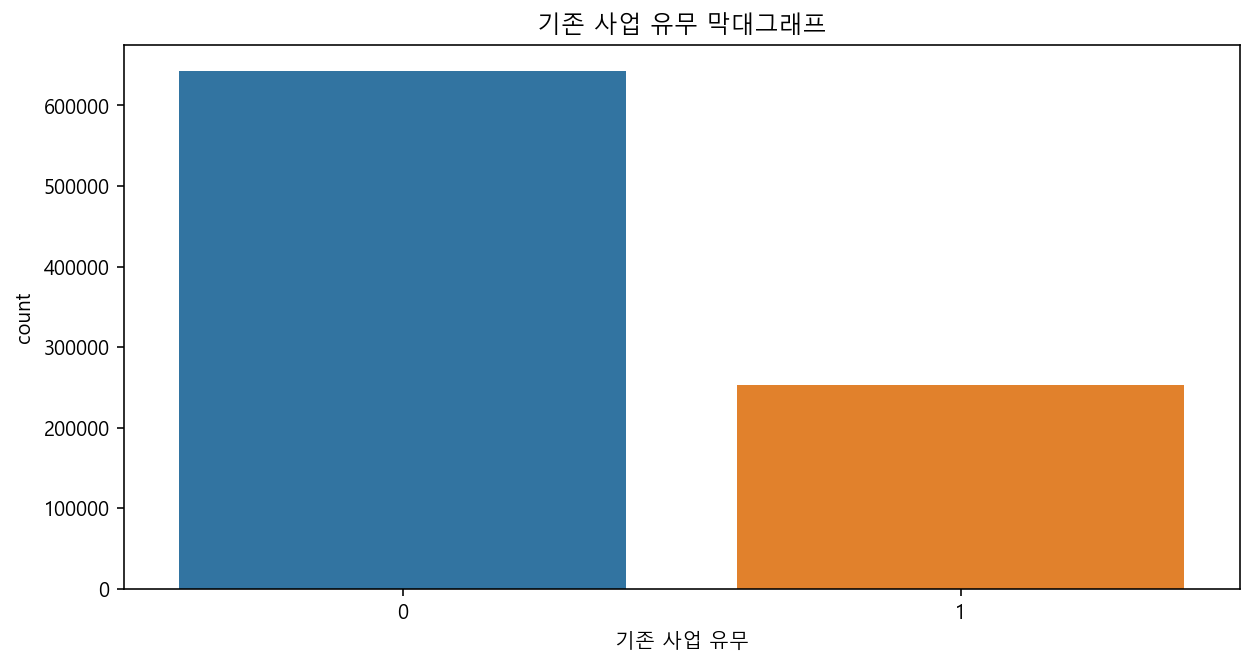

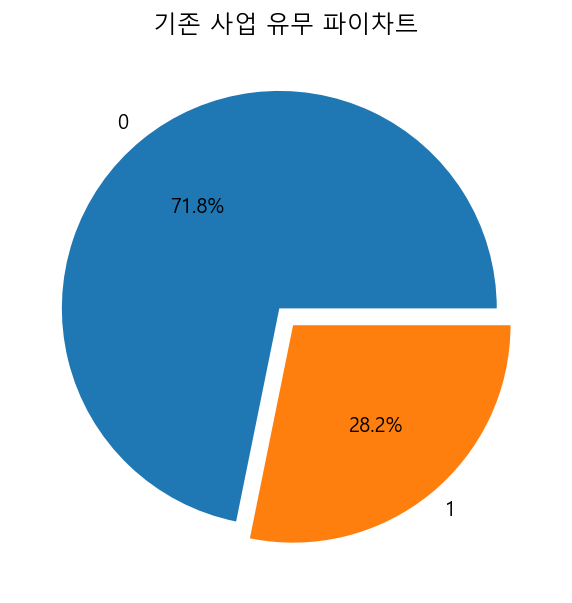

In [77]:
# 분포 확인하기
# 막대그래프
plt.figure(figsize=(10, 5))
sns.countplot(x='NewExist', data=df3)
plt.title('기존 사업 유무 막대그래프')
plt.xlabel('기존 사업 유무')
plt.show()

# 파이차트
plt.figure(figsize=(10, 5))
df3['NewExist'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%.1f%%')
plt.title('기존 사업 유무 파이차트')
plt.ylabel('')
plt.show()

- 전체 데이터 중 기존 사업이 약 70%, 신규 사업이 약 30% 정도 차지
- 도메인 지식(데이터 설명 자료)을 통해 기존 비즈니스는 2년 이상, 신규 비즈니스는 2년 미만 사업을 의미
- 그렇다면 신규 비즈니스가 기존 비즈니스보다 채무 불이행률이 더 높게 나타나지 않을까?

(13) FranchiseCode

In [78]:
df3.FranchiseCode

0         1
1         1
2         1
3         1
4         1
         ..
899159    1
899160    1
899161    1
899162    1
899163    1
Name: FranchiseCode, Length: 895320, dtype: int64

In [79]:
df3.FranchiseCode.value_counts()

1        636305
0        207410
78760      3364
68020      1917
50564      1031
          ...  
75677         1
77030         1
19660         1
18125         1
25366         1
Name: FranchiseCode, Length: 2762, dtype: int64

=> 캐글 변수 설명에서 0과 1이 프랜차이즈가 아닌 경우이고, 나머지 경우가 프랜차이즈라고 했으므로 0=프랜차이즈 아님, 1=프랜차이즈로 재분류

In [80]:
# Franchisecode 열에서 0과 1은 0으로, 그 이외의 숫자는 1으로 재분류
df3['FranchiseCode'] = df3['FranchiseCode'].apply(lambda x: 0 if x in [0, 1] else 1)

In [81]:
df3.FranchiseCode.value_counts()

0    843715
1     51605
Name: FranchiseCode, dtype: int64

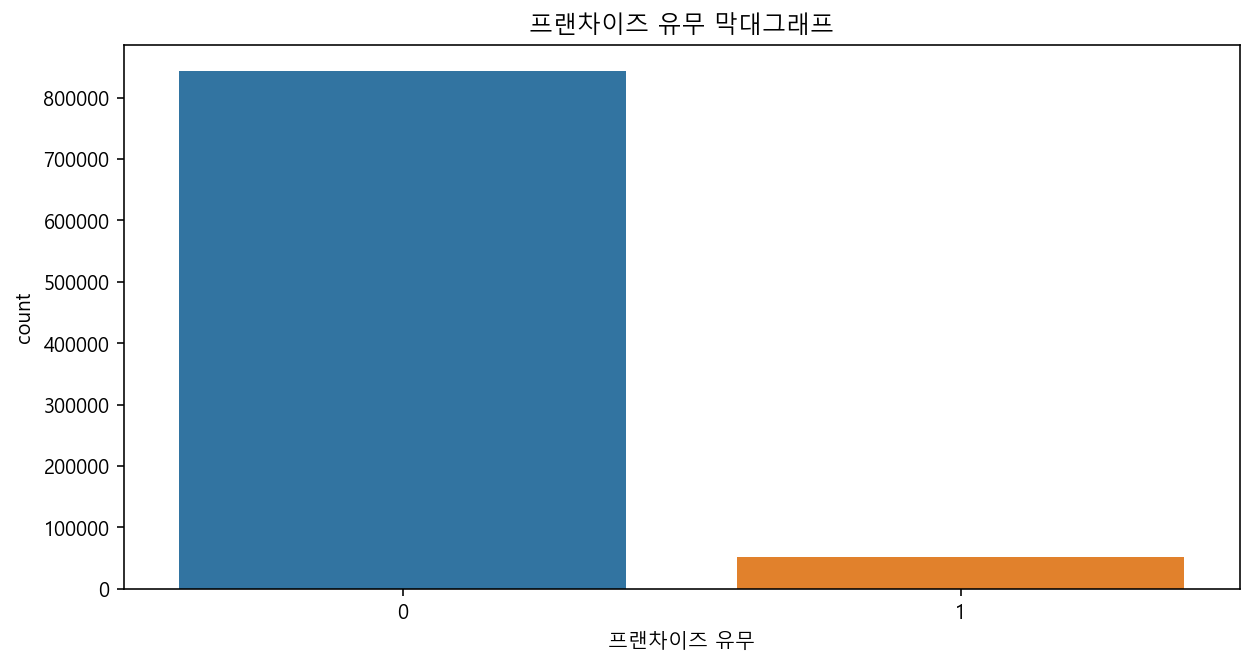

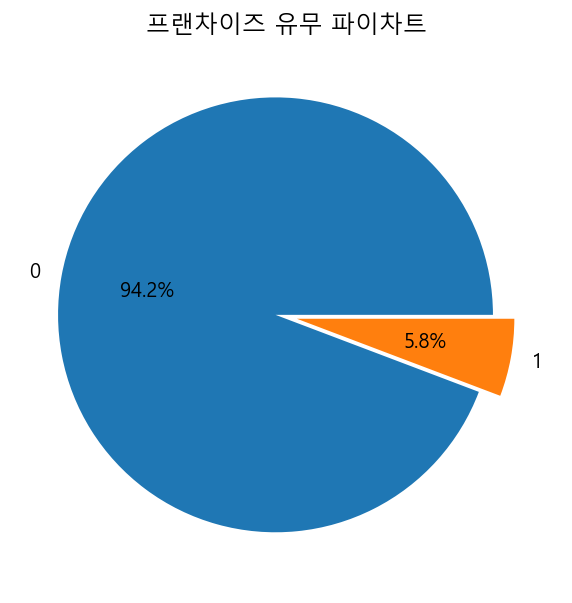

In [82]:
# 분포 확인하기
# 막대그래프
plt.figure(figsize=(10, 5))
sns.countplot(x='FranchiseCode', data=df3)
plt.title('프랜차이즈 유무 막대그래프')
plt.xlabel('프랜차이즈 유무')
plt.show()

# 파이차트
plt.figure(figsize=(10, 5))
df3['FranchiseCode'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%.1f%%')
plt.title('프랜차이즈 유무 파이차트')
plt.ylabel('')
plt.show()

- 프랜차이즈 아님(0) : 프랜차이즈 (1) = 약 9:1
- 프랜차이즈가 아닌 기업의 수가 매우 많다. => SBA는 스타트업과 같이 규모가 작은 기업을 대상으로 하기 때문
- 프랜차이즈가 아닌 기업이 프랜차이즈인 경우에 비해 채무불이행률이 높을 거라고 예상된다.

(14) UrbanRural

In [83]:
df3.UrbanRural

0         0
1         0
2         0
3         0
4         0
         ..
899159    0
899160    0
899161    0
899162    0
899163    0
Name: UrbanRural, Length: 895320, dtype: int64

=> 캐글 변수 설명에 의하면 1=urban, 2=rural, 0=undefined

In [103]:
# 0인 경우만 추출
df3[df3.UrbanRural==0]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,SameState,Recession
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,...,NaN,28-Feb-99,60000,0,0,0,60000,48000,0,0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,...,NaN,31-May-97,40000,0,0,0,40000,32000,1,0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,...,NaN,31-Dec-97,287000,0,0,0,287000,215250,1,0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,...,NaN,30-Jun-97,35000,0,0,0,35000,28000,1,0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,...,NaN,14-May-97,229000,0,0,0,229000,229000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,1997-02-27,1997,...,NaN,30-Sep-97,70000,0,0,0,70000,56000,0,0
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,...,NaN,31-Oct-97,85000,0,0,0,85000,42500,0,0
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1997-02-27,1997,...,NaN,30-Sep-97,300000,0,0,0,300000,225000,1,0
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997,...,8-Mar-00,31-Mar-97,75000,0,1,46383,75000,60000,1,0


In [84]:
df3.UrbanRural.value_counts()

1    468807
0    321639
2    104874
Name: UrbanRural, dtype: int64

- <span style="color:Red">0을 가지는 경우가 30만개로 많다.</span>
- <span style="color:Red">State나 City 변수를 보고 0을 채워야 하나?</span>
- <span style="color:Blue">미국 인구 수를 기준으로 10위 안에 드는 State인 경우 도시(1), 아닌 경우 시골(2)로 재분류!</span>

(15) RevLineCr (결측치 있음)

In [85]:
df3.RevLineCr

0         N
1         N
2         N
3         N
4         N
         ..
899159    0
899160    Y
899161    N
899162    N
899163    N
Name: RevLineCr, Length: 895320, dtype: object

In [86]:
df3.RevLineCr.value_counts()

N    417559
0    257363
Y    200587
T     15232
1        22
R        14
`        11
2         6
C         2
7         1
5         1
-         1
A         1
3         1
4         1
,         1
Q         1
.         1
Name: RevLineCr, dtype: int64

- <span style="color:Red">Y랑 N만 있는 게 아님, 특히 0은 Y의 개수보다 많음</span>
- <span style="color:Blue">은행별로 표기가 통일되지 않아 발생한 데이터라 판단, 해당 변수 삭제</span>

In [87]:
df3 = df3.drop(columns=['RevLineCr'])
df3.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'LowDoc',
       'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross',
       'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'SameState',
       'Recession'],
      dtype='object')

(16) LowDoc

In [88]:
df3.LowDoc

0         Y
1         Y
2         N
3         Y
4         N
         ..
899159    N
899160    N
899161    N
899162    Y
899163    N
Name: LowDoc, Length: 895320, dtype: object

In [89]:
df3.LowDoc.value_counts()

N    779308
Y    110022
0      1489
C       754
S       602
A       495
R        74
1         1
Name: LowDoc, dtype: int64

- <span style="color:Red">Y랑 N만 있는 게 아님.</span>
- <span style="color:Blue">데이터 설명 자료를 통해 (0,C,S,A,R,1)은 entry error임을 알 수 있었음. 따라서 Y랑 N만 남기고 나머지 값들은 제거.</span>

In [90]:
# Y랑 N 이외에 다른 값을 가진 경우, 해당 행을 제거
df4 = df3[df3['LowDoc'].isin(['Y', 'N'])]

In [91]:
df4

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,SameState,Recession
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,...,NaN,28-Feb-99,60000,0,0,0,60000,48000,0,0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,...,NaN,31-May-97,40000,0,0,0,40000,32000,1,0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,...,NaN,31-Dec-97,287000,0,0,0,287000,215250,1,0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,...,NaN,30-Jun-97,35000,0,0,0,35000,28000,1,0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,...,NaN,14-May-97,229000,0,0,0,229000,229000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,1997-02-27,1997,...,NaN,30-Sep-97,70000,0,0,0,70000,56000,0,0
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,...,NaN,31-Oct-97,85000,0,0,0,85000,42500,0,0
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1997-02-27,1997,...,NaN,30-Sep-97,300000,0,0,0,300000,225000,1,0
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997,...,8-Mar-00,31-Mar-97,75000,0,1,46383,75000,60000,1,0


In [92]:
# 0=No, 1=Yes로 재분류
df4['LowDoc'] = df4['LowDoc'].replace({'N': 0, 'Y': 1})
df4.NewExist.value_counts()

0    639353
1    249977
Name: NewExist, dtype: int64

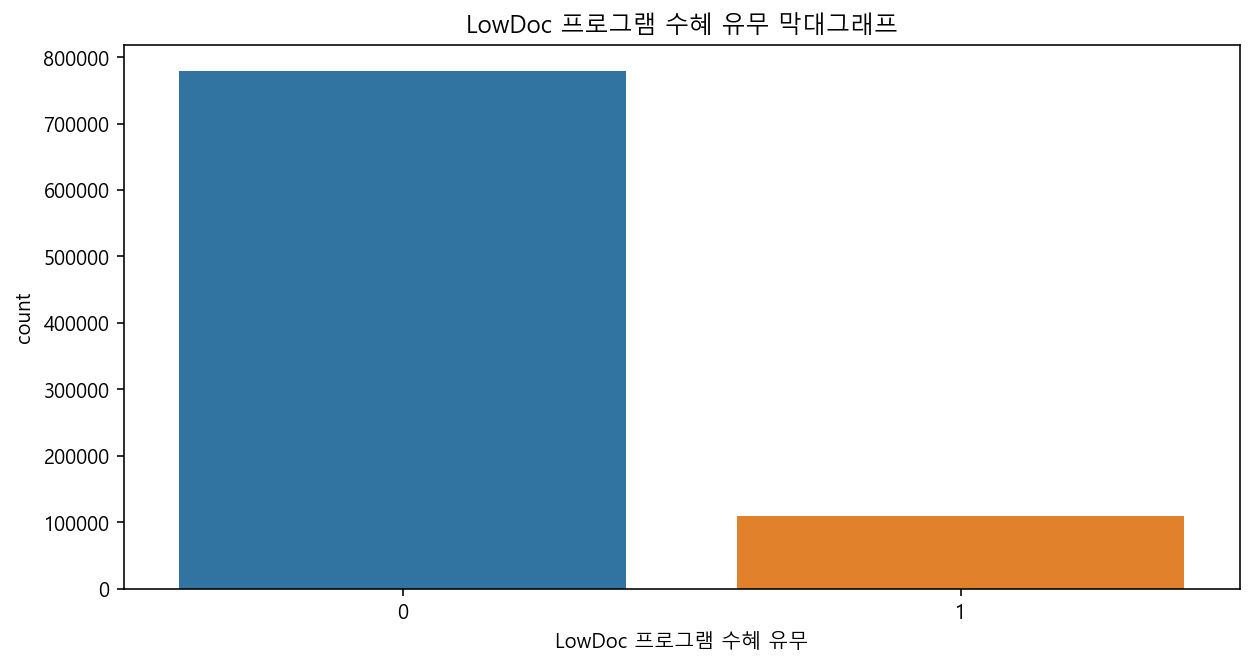

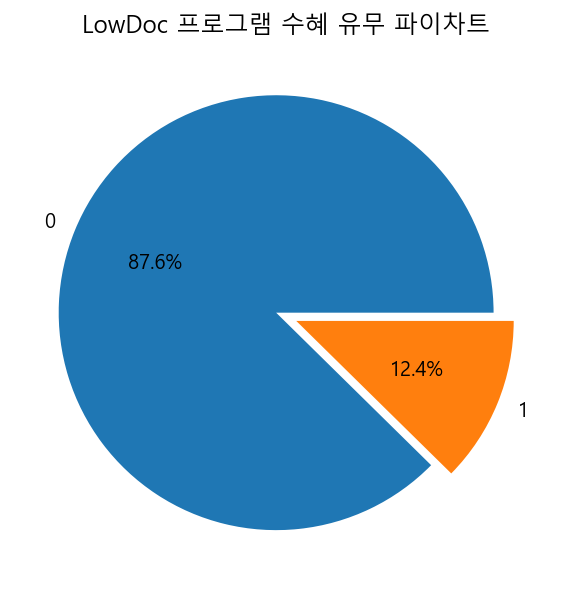

In [114]:
# 분포 확인하기
# 막대그래프
plt.figure(figsize=(10, 5))
sns.countplot(x='LowDoc', data=df4)
plt.title('LowDoc 프로그램 수혜 유무 막대그래프')
plt.xlabel('LowDoc 프로그램 수혜 유무')
plt.show()

# 파이차트
plt.figure(figsize=(10, 5))
df4['LowDoc'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%.1f%%')
plt.title('LowDoc 프로그램 수혜 유무 파이차트')
plt.ylabel('')
plt.show()

(17) ChgOffDate : 대출이 채무불이행으로 선언되는 날짜

In [93]:
df4.ChgOffDate

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
899159         NaN
899160         NaN
899161         NaN
899162    8-Mar-00
899163         NaN
Name: ChgOffDate, Length: 889330, dtype: object

In [94]:
df4.ChgOffDate.value_counts()

13-Mar-10    727
20-Feb-10    605
30-Jan-10    513
6-Feb-10     460
6-Mar-10     416
            ... 
17-Jul-97      1
10-Jun-94      1
17-Nov-92      1
26-Aug-00      1
15-Nov-94      1
Name: ChgOffDate, Length: 6388, dtype: int64

In [95]:
# NA 개수 확인
df4['ChgOffDate'].isna().sum()

729223

=> 약 70만개가 NA이다. DisbursementDate와 Term 조합해 결측치 대체할 예정

(18) DisbursementDate : 대금 지급일

In [96]:
df4['DisbursementDate']

0         28-Feb-99
1         31-May-97
2         31-Dec-97
3         30-Jun-97
4         14-May-97
            ...    
899159    30-Sep-97
899160    31-Oct-97
899161    30-Sep-97
899162    31-Mar-97
899163    31-May-97
Name: DisbursementDate, Length: 889330, dtype: object

In [97]:
df4['DisbursementDate'].isna().sum()

2123

=> 2123개 결측치 지우기로 했으므로 삭제!

In [98]:
df4 = df4.dropna(subset=['DisbursementDate'])
df4['DisbursementDate'].isna().sum()

0

In [99]:
# Term 변수에 결측치 있는지 확인
df4.Term.isna().sum()

0

In [103]:
# df4에서 DisbursementDate와 Term 컬럼 선택
date_term = df4[['DisbursementDate', 'Term']]

# DisbursementDate를 날짜로 변환
date_term['DisbursementDate'] = pd.to_datetime(date_term['DisbursementDate'], format='%d-%b-%y')

# Term에 해당하는 개월 수를 더하여 ChgOffDate2 변수 생성
date_term['ChgOffDate2'] = date_term['DisbursementDate'] + pd.to_timedelta(date_term['Term'], unit='D') * 30
date_term['ChgOffDate2']

0        2006-01-22
1        2002-05-05
2        2012-10-13
3        2002-06-04
4        2017-01-29
            ...    
899159   2002-09-04
899160   2002-10-05
899161   2006-08-14
899162   2002-03-05
899163   2001-05-10
Name: ChgOffDate2, Length: 887207, dtype: datetime64[ns]

## 수치형 변수

(17) Term : 대출 기간(개월)

In [124]:
df4.Term

0          84
1          60
2         180
3          60
4         240
         ... 
899159     60
899160     60
899161    108
899162     60
899163     48
Name: Term, Length: 887207, dtype: int64

In [125]:
df4.Term.value_counts()

84     226467
60      89024
240     85433
120     76799
300     44073
        ...  
396         1
398         1
402         1
403         1
511         1
Name: Term, Length: 411, dtype: int64

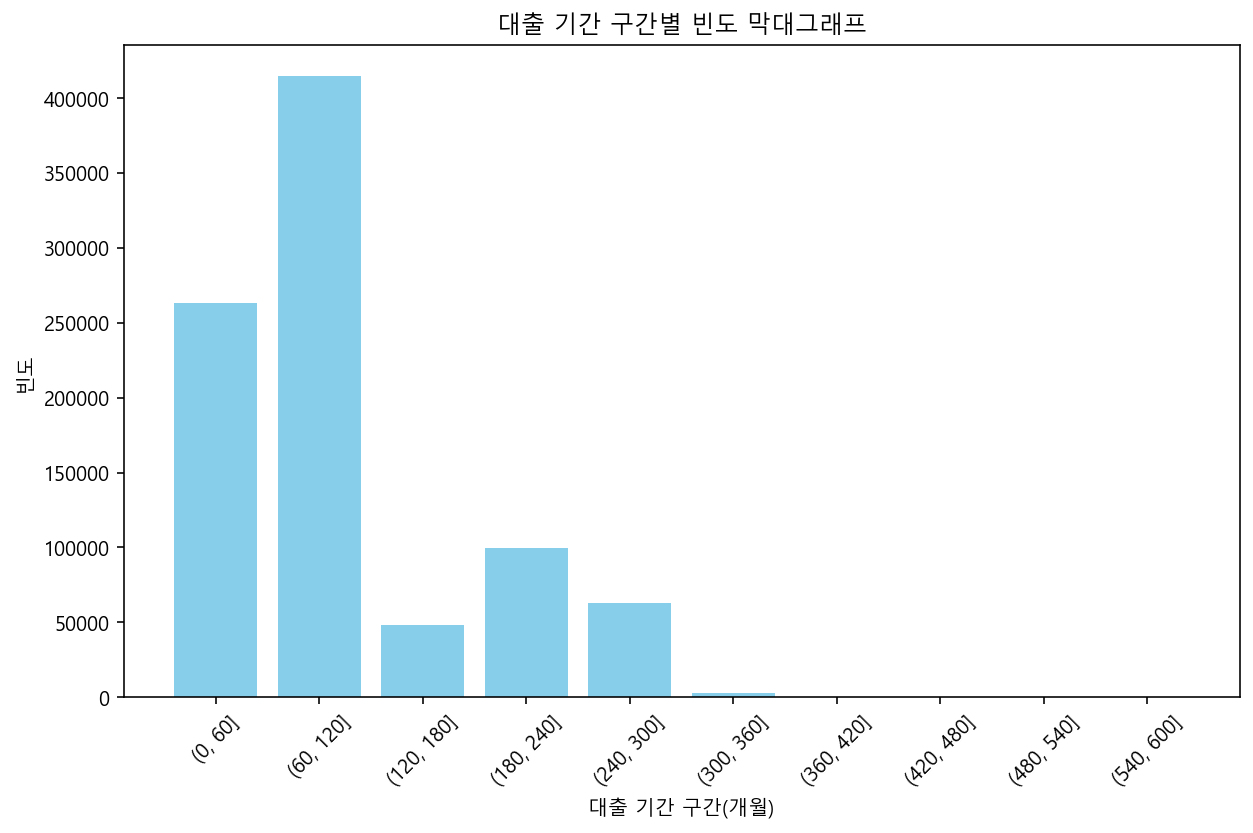

In [40]:
# 막대그래프로 시각화

# 대출 기간을 일정 구간으로 나누기 위한 구간 설정
bins = np.arange(0, df3['Term'].max() + 60, 60)  # 60개월 간격으로 구간 설정

# 대출 기간을 구간에 매핑
term_bins = pd.cut(df3['Term'], bins=bins)

# 각 구간의 빈도수 계산
term_counts = term_bins.value_counts().sort_index()

# 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.bar(term_counts.index.astype(str), term_counts.values, color='skyblue')
plt.xlabel('대출 기간 구간(개월)')
plt.ylabel('빈도')
plt.title('대출 기간 구간별 빈도 막대그래프')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

- 5년 ~ 10년(60개월~120개월) 단위의 대출 기간이 가장 빈도가 높게 나타났다.
- 장기로 대출을 해주는 경우도 구간별로 1건씩 존재한다.

In [42]:
# 대출 기간이 25년보다 긴 경우만 추출
df3[df3['Term'] > 300]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,SameState,Month,Year,DisbursementDate2
1264,1008654001,"MURRIETA CAR WASH, INC.",MURRIETA,CA,92562,WELLS FARGO BANK NATL ASSOC,SD,811192,1997-03-04,1997,...,850500,0,0,0,850500,637875,1,3,1997,1997-03-31
1317,1008944005,WESTERN STATES CONVERTERS & TR,LA MIRADA,CA,90638,PACIFIC WESTERN BANK,CA,811111,1997-03-04,1997,...,515000,0,0,0,515000,386250,0,3,1997,1997-05-31
1325,1008994009,ADVANCO FIRE PROTECTION INC.,MONTCLAIR,CA,91763,PACIFIC WESTERN BANK,CA,332996,1997-03-04,1997,...,395100,0,0,0,463500,347625,0,3,1997,1997-03-31
1594,1010894002,"B & B SALES AND IMPORTS, INC.",OXNARD,CA,93030,CITY NATIONAL BANK,CA,0,1997-03-05,1997,...,479333,0,0,0,479333,359499,0,3,1997,1997-07-31
1818,1012144004,SLEEP INN MIDLAND,MIDLAND,TX,79703,LOANS FROM OLD CLOSED LENDERS,DC,0,1997-03-05,1997,...,982700,0,0,0,1043000,749990,1,3,1997,1998-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898477,9980473006,TOMORROW'S DREAM BEDDING CO.IN,BROOKLYN,NY,11223,NEWTEK SMALL BUS. FINANCE INC.,NY,0,1997-02-21,1997,...,225000,0,0,0,225000,168750,0,2,1997,1997-02-21
898528,9982273009,COLLIERVILLE COLLISION SPECIAL,COLLIERVILLE,TN,38017,BANKTENNESSEE,TN,811121,1997-02-24,1997,...,375000,0,0,0,375000,281250,0,2,1997,1997-06-30
898608,9983763005,COMMERCIAL RADIO & ELECTRONICS,EUREKA,CA,95501,NORTH VALLEY BANK,CA,0,1997-02-24,1997,...,439750,0,0,0,439750,329813,0,2,1997,1997-07-31
898609,9983783000,RIDGELAND INN AND SUITES,RICHLAND,MS,39218,SMALL BUS. LOAN SOURCE LLC,TX,0,1997-02-24,1997,...,866000,0,0,0,866000,649500,1,2,1997,1998-01-31


In [43]:
# 대출 기간이 25년보다 크고 채무 불이행한 경우 추출
df3[(df3['Term'] > 300) & (df3['MIS_Status'] == 1)]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,SameState,Month,Year,DisbursementDate2
4562,1031333001,DILLINGHAM GRAPHICS,ROCK HILL,SC,29730,BANK OF AMERICA NATL ASSOC,NC,0,1980-08-21,1980,...,45000,0,1,10244,45000,40500,1,8,1980,1980-09-11
5824,1039743000,MIRAGE GIFTS,SPRINGFIELD,MO,65807,"UMB BANK, NATIONAL ASSOCIATION",MO,0,1980-09-03,1980,...,80000,0,1,6672,80000,72000,0,9,1980,1980-09-25
8264,1055953004,THE COPY STOP,MOBILE,AL,36609,REGIONS BANK,AL,0,1980-09-25,1980,...,40000,0,1,18516,40000,36000,0,9,1980,1980-12-16
8365,1056575002,"Kleinhans Enterprises, Ltd",CHILTON,WI,53014,"M&I, A BRANCH OF",WI,721211,2004-09-09,2004,...,1300000,0,1,657356,1300000,975000,0,9,2004,2005-08-31
18867,1137863005,"UNION PRINTING COMPANY, INC",FLINT,MI,48505,BANK OF AMERICA NATL ASSOC,MI,0,1981-01-02,1981,...,150000,0,1,74108,150000,135000,0,1,1981,1981-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782926,8299581006,ELLICOTT LANES C/O ALLIED LANE,BUFFALO,NY,14214,MANUFACTURERS & TRADERS TR CO,NY,0,1978-08-09,1978,...,411000,0,1,285997,411000,369900,0,8,1978,1978-10-30
814961,8734391003,SABIN INDUSTRIES,EL PASO,TX,79907,RTC/REGIONAL OPERATING CENTER,TX,0,1977-10-24,1978,...,240000,0,1,57740,240000,216000,0,10,1977,1978-01-10
816277,8748651010,CHEMICAL PRODUCTS INC,MILPITAS,CA,95035,FEDERAL DEBT MANAGEMENT,TX,0,1978-09-29,1978,...,50000,0,1,35714,50000,45000,1,9,1978,1978-12-08
839458,9000391009,"CARL GRANT TRACTOR CO., INC.",ROBERTSDALE,AL,36567,"PNC BANK, NATIONAL ASSOCIATION",AL,0,1978-02-02,1978,...,250000,0,1,107376,250000,225000,0,2,1978,1978-02-27


=> 79건의 경우 대출 기간도 긴 데다가, 채무불이행!

- 파생변수 만들기
- 5년 미만 : 단기
- 5년 ~ 15년 이하 : 중기
- 15년 ~ 25년 이하 : 장기
- 25년 초과 : 이상치

In [45]:
# 25년 초과인 데이터 제거
df3 = df3[df3['Term'] <= 300]

In [46]:
# 5년 미만


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,SameState,Month,Year,DisbursementDate2


(2) NoEmp : 직원 수

In [47]:
df3.NoEmp

0          4
1          2
2          7
3          2
4         14
          ..
899159     6
899160     6
899161    26
899162     6
899163     1
Name: NoEmp, Length: 890067, dtype: int64

In [48]:
df3.NoEmp.value_counts().sort_values(ascending=False)

1       152571
2       137089
3        89898
4        72996
5        59743
         ...  
4012         1
1012         1
7216         1
2610         1
354          1
Name: NoEmp, Length: 596, dtype: int64

=> 직원 수가 1명인 경우가 제일 많음? 

In [49]:
df3[df3.NoEmp == 0]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,SameState,Month,Year,DisbursementDate2
1089,1007485003,Hoffman and Associates Dental,ORLANDO,FL,32826,WELLS FARGO BANK NATL ASSOC,SD,339116,2003-08-01,2003,...,86000,0,0,0,86000,43000,1,8,2003,2003-09-30
1092,1007495006,Hoffman and Associates Dental,ORLANDO,FL,32826,WELLS FARGO BANK NATL ASSOC,SD,339116,2003-08-01,2003,...,36857,0,0,0,20000,10000,1,8,2003,2003-12-31
1463,1009885009,"THE TIRE DEPOT, INC",BRANDON,MS,39047,TRUSTMARK NATIONAL BANK,MS,441320,2004-01-15,2004,...,84168,0,0,0,50000,25000,0,1,2004,2004-08-31
1517,1010355000,Tropical Smoothie Cafe and Del,MADISON,AL,35758,WELLS FARGO BANK NATL ASSOC,SD,722211,2004-03-09,2004,...,125000,0,0,0,125000,62500,1,3,2004,2004-08-31
1590,1010865000,The Matterhorn - Ice Cream & C,COLLEGEVILLE,PA,19426,UNIVEST BANK AND TRUST CO.,PA,722213,2004-03-26,2004,...,65003,0,0,0,45000,22500,0,3,2004,2004-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664272,6728795005,JH Group LLC,PEARL CITY,HI,96782,"AMERICAN SAVINGS BANK, FSB",HI,722511,2014-03-18,2014,...,200000,0,0,0,200000,180000,0,3,2014,2014-03-18
669507,6816425010,"Toasted Frog Fargo, LLC",FARGO,ND,58105,BANK FORWARD,ND,722511,2014-05-06,2014,...,150000,0,0,0,150000,75000,0,5,2014,2014-06-30
672918,6878215001,"Onsite Contractors, LLC",Harrison,OH,45030,THE HUNTINGTON NATIONAL BANK,OH,237110,2014-06-05,2014,...,17200,0,0,0,17200,8600,0,6,2014,2014-06-05
673911,6895265007,MARK DEMATTIA INCORPORATED,EWA BEACH,HI,96706,CENTRAL PACIFIC BANK,HI,492210,2014-06-12,2014,...,50000,0,0,0,50000,25000,0,6,2014,2014-06-12


### 샘플링
- 총 행의 개수가 20만 개
- 채무 이행:불이행 = 9:1이 되도록 랜덤 샘플링

In [6]:
np.random.seed(42)
df2=df.copy() #샘플링을 위해 원본 데이터 copy

In [7]:
df2['MIS_Status']=df2['MIS_Status'].replace({'P I F':0, 'CHGOFF':1}) #채무 이행(0=P|F), 채무 불이행(1=CHGOFF)

In [8]:
df2['MIS_Status'].unique() #NA 존재

array([ 0.,  1., nan])

In [9]:
total_samples = 200000  # 전체 샘플링 개수
sampling_ratios = {0: 0.9, 1: 0.1}

# 각 MIS_Status 값에 대해 샘플링되는 행의 개수 계산
sample_counts = {key: int(total_samples * ratio) for key, ratio in sampling_ratios.items()}

# 각 'MIS_Status' 값에 대해 샘플링 비율에 따라 랜덤 샘플링 수행
df3 = df2.groupby('MIS_Status', group_keys=False).apply(lambda x: x.sample(n=sample_counts[x.name]))

display(df3)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
785769,8338103009,PRO GOLF DISCOUNT OF JACKSON I,JACKSON,MS,39046,TRUSTMARK NATIONAL BANK,MS,451110,15-May-95,1995,...,N,N,NaN,31-Jul-95,"$160,000.00",$0.00,0.0,$0.00,"$160,000.00","$136,000.00"
404518,3903195007,"Southern Hospitality, LLC d/b/",BRONX,NY,10460,HOME LOAN INVEST BANK F.S.B.,RI,721110,12-Feb-10,2010,...,N,N,NaN,1-Mar-10,"$2,000,000.00",$0.00,0.0,$0.00,"$2,000,000.00","$1,500,000.00"
629088,6247903008,RIVER VALLEY VETERINARY CENTER,DILLARD,OR,97432,U.S. BANK NATIONAL ASSOCIATION,OR,541940,22-Feb-94,1994,...,N,N,NaN,30-Apr-94,"$99,900.00",$0.00,0.0,$0.00,"$99,900.00","$89,910.00"
885439,9694393005,"NOAH'S CLEANERS, INC.",WESTLAKE VILLAGE,CA,91362,"CITIBANK, N.A.",SD,812320,25-Oct-96,1997,...,0,N,NaN,31-Jan-97,"$175,000.00",$0.00,0.0,$0.00,"$175,000.00","$131,250.00"
689699,7144233010,"SUNRISE DELIVERY SERVICE, INC.",LOS ANGELES,CA,90038,HANMI BANK,CA,0,17-Jun-94,1994,...,N,N,NaN,31-Jul-94,"$205,000.00",$0.00,0.0,$0.00,"$205,000.00","$153,750.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208572,2471855005,"GOLF CREST MORTGAGE, INC. DBA",TAMPA,FL,33618,CAPITAL ONE NATL ASSOC,VA,522310,23-May-07,2007,...,N,N,5-Dec-08,30-Jun-07,"$50,000.00",$0.00,1.0,"$47,336.00","$50,000.00","$25,000.00"
183238,2302725000,Clippers Cove Hair and Nail Sa,AMHERST,OH,44001,JPMORGAN CHASE BANK NATL ASSOC,IL,812112,28-Feb-07,2007,...,Y,N,12-Aug-10,31-Mar-07,"$52,100.00",$0.00,1.0,"$24,980.00","$25,000.00","$12,500.00"
268619,2874635003,SALON 64,KNIGHTDALE,NC,27545,"SUPERIOR FINANCIAL GROUP, LLC",CA,812112,20-Dec-07,2008,...,N,N,9-Jun-11,31-Dec-07,"$7,500.00",$0.00,1.0,"$6,947.00","$7,500.00","$6,375.00"
281261,2949185005,Pachitos Ice Cream Corp.,Miami,FL,33186,COMMUNITY SOUTH BANK,TN,311520,11-Feb-08,2008,...,N,N,21-Aug-13,29-Feb-08,"$163,000.00",$0.00,1.0,"$121,390.00","$163,000.00","$122,250.00"


In [12]:
# MIS_Status 열을 정수형으로 변환하여 0과 1로 카테고리화
df3['MIS_Status'] = df3['MIS_Status'].astype(int)

In [13]:
df3['MIS_Status'].value_counts()

0    180000
1     20000
Name: MIS_Status, dtype: int64

=> 채무이행(0)은 18만개, 채무불이행(1)은 2만개로 9:1의 비율인 것을 확인할 수 있음